# Analiza wpływu spożycia alkoholu na postępy w nauce


## Eksploracja danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
por = pd.read_csv('student-por.csv', parse_dates=True)
mat = pd.read_csv('student-mat.csv', parse_dates=True)

In [18]:
por.info()
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [19]:
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','schoolsup','famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

In [20]:
gr_common=pd.merge(por,mat,on = columns)
print(gr_common.shape[0], " - jest liczbą tych samych studentów w zbiorach - 'por' i 'mat'")

370  - jest liczbą tych samych studentów w zbiorach - 'por' i 'mat'


In [42]:
gr_common['G3_mean'] = gr_common[['G3_x', 'G3_y']].mean(axis=1)
gr_common = gr_common.drop(['G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y'], axis=1)
gr_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      370 non-null    object 
 1   sex         370 non-null    object 
 2   age         370 non-null    int64  
 3   address     370 non-null    object 
 4   famsize     370 non-null    object 
 5   Pstatus     370 non-null    object 
 6   Medu        370 non-null    int64  
 7   Fedu        370 non-null    int64  
 8   Mjob        370 non-null    object 
 9   Fjob        370 non-null    object 
 10  reason      370 non-null    object 
 11  guardian    370 non-null    object 
 12  traveltime  370 non-null    int64  
 13  studytime   370 non-null    int64  
 14  failures_x  370 non-null    int64  
 15  schoolsup   370 non-null    object 
 16  famsup      370 non-null    object 
 17  paid_x      370 non-null    object 
 18  activities  370 non-null    object 
 19  nursery     370 non-null    o

Dane, które będą wykorzystane w danym projekcie zawierają informacje o studentach kursów języka portugalskiego oraz matematyki.
Dane o studentach będą zawierały takie informacje, jak:
1. szkoła
2. płeć 
3. wiek
4. miejsce zamieszkania - U - miasto (urban), R - okolice (rural) 
5. ilość członków rodziny
6. status wspólnego pożycia rodziców
7. wykształcenie matki
8. wykształcenie ojca
9. praca matki
10. praca ojca
11. powód wybrania tej szkoły
12. opiekun ucznia (matka, ojciec, inne)
13. czas dojazdu od domu do szkoły
14. ilość godzin poświęconych nauce w tygodniu
15. liczba niepowodzeń z poprzednich klas
16. dodatkowe nauczanie
17. rodzinne wsparcie edukacyjne
18. zajęcia dodatkowe płatne w ramach przedmiotu kursu
19. zajęcia dodatkowe
20. uczęszczanie do przedszkola
21. wyraz chęci do wykształcenia wyższego
22. dostęp do internetu w domu
23. w związku romantycznym
24. jakość relacji rodzinnych
25. czas wolny poza szkołą
26. wychodzenie z przyjaciółmi
27. spożycie alkoholu w dni robocze
28. spożycie alkoholu w weekend
29. aktualny stan zdrowia
30. liczba nieobecności w szkole

31. ocena za pierwszy semestr
32. ocena za drugi semestr
33. ocena końcowa

<AxesSubplot:>

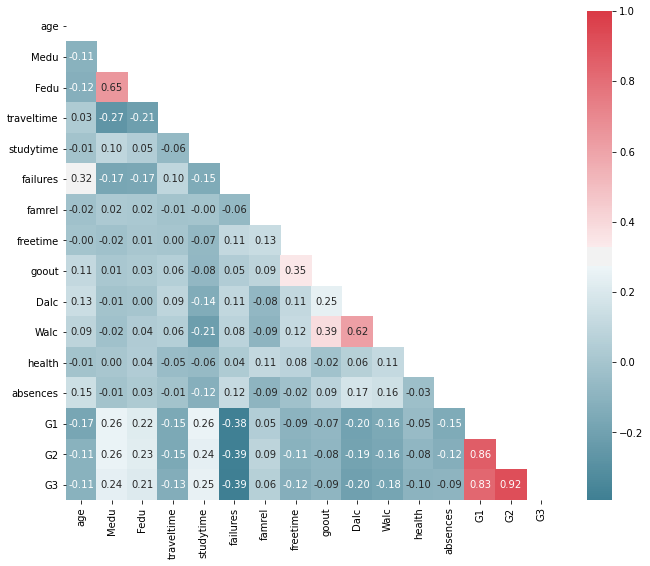

In [7]:
corr_p = por.corr()
dropSelf = np.zeros_like(corr_p)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(11,9))
sns.heatmap(corr_p, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

In [8]:
mat['school'] = mat['school'].apply(lambda x: 0 if x=='GP' else 1)
mat['sex'] = mat['sex'].apply(lambda x: 0 if x=='F' else 1)
mat['address'] = mat['address'].apply(lambda x: 0 if x=='U' else 1)
mat['famsize'] = mat['famsize'].apply(lambda x: 0 if x=='GT3' else 1)
mat['Pstatus'] = mat['Pstatus'].apply(lambda x: 0 if x=='A' else 1)
mat['Mjob'] = mat['Mjob'].apply(lambda x: 0 if x=='teacher' else (1 if x=='health' else (2 if x == 'services' else (3 if x == 'at_home' else 4))))
mat['Fjob'] = mat['Fjob'].apply(lambda x: 0 if x=='teacher' else (1 if x=='health' else (2 if x == 'services' else (3 if x == 'at_home' else 4))))
mat['reason'] = mat['reason'].apply(lambda x: 0 if x=='home' else (1 if x=='reputation' else (2 if x == 'course' else 3)))
mat['guardian'] = mat['guardian'].apply(lambda x: 0 if x=='mother' else (1 if x == 'father' else 2))
mat['schoolsup'] = mat['schoolsup'].apply(lambda x: 0 if x=='yes' else 1)
mat['famsup'] = mat['famsup'].apply(lambda x: 0 if x=='yes' else 1)
mat['paid'] = mat['paid'].apply(lambda x: 0 if x=='yes' else 1)
mat['activities'] = mat['activities'].apply(lambda x: 0 if x=='yes' else 1)
mat['nursery'] = mat['nursery'].apply(lambda x: 0 if x=='yes' else 1)
mat['higher'] = mat['higher'].apply(lambda x: 0 if x=='yes' else 1)
mat['internet'] = mat['internet'].apply(lambda x: 0 if x=='yes' else 1)
mat['romantic'] = mat['romantic'].apply(lambda x: 0 if x=='yes' else 1)

<AxesSubplot:>

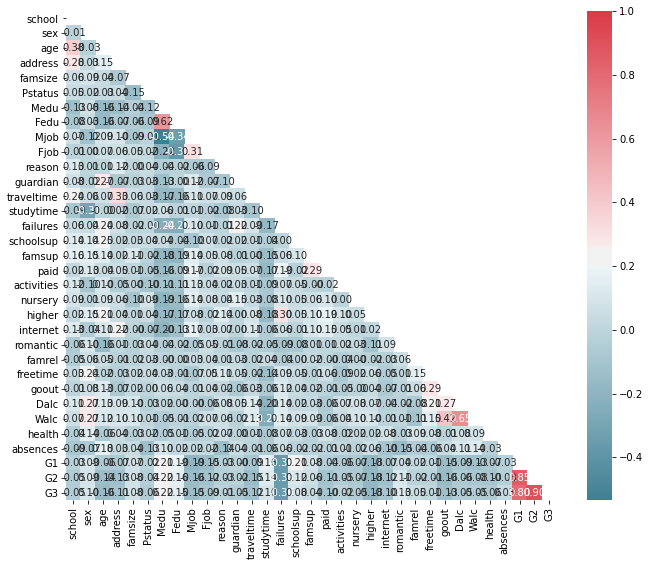

In [9]:
corr_m = mat.corr()
dropSelf = np.zeros_like(corr_m)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(11,9))
sns.heatmap(corr_m, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

<AxesSubplot:>

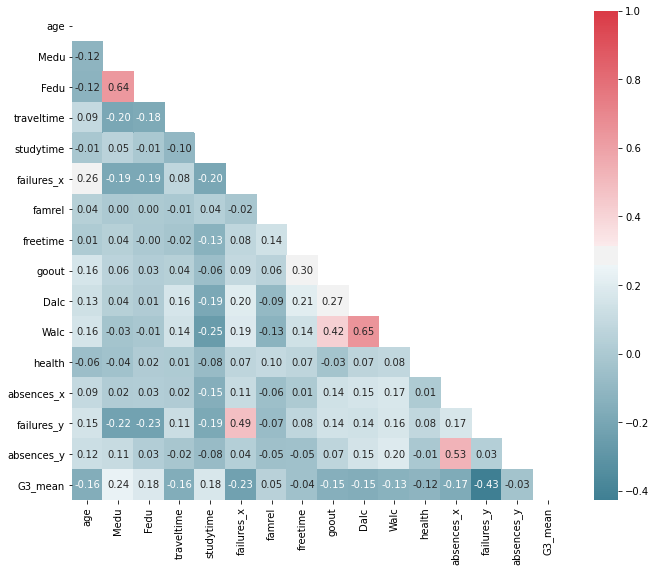

In [10]:
corr_p = gr_common.corr()
dropSelf = np.zeros_like(corr_p)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(11,9))
sns.heatmap(corr_p, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

Wyraźnie widać, że oceny G1, G2 i G3 są skorelowane w wysokim stopniu z przyczyn oczywistych. Ogólnie inne atrybuty są współzależne na niskim poziomie, ale możemy zauważyć, że na oceny wpływa m. in. ilość poraszek w przeszłości, wykształcenie rodziców oraz czas, spędzony za nauką.
Również współczynnikiem korelacji wydzielają się cechy wykształcena rodziców, zbiory cech 'goout', 'Dalc', 'Walc' i 'freetime', które opisują wychodzenie z przyjaciółmi, spożycie alkoholu w dni powszechne, weekend i czas wolny.

In [11]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [12]:
mat.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.288608,0.896203,2.749367,2.521519,2.483544,2.956962,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.421948,1.294530,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Miary rozrzutu, wyciągnięte za pomocą metody describe(), nie wskazują na znaczną różnicę między statystykami kursów.
Średnia wartość nieobecności jest wyższa w przypadku danych dotyczących kursu matematyki, ale mówiąc o maksymalnej wartości, różni się ona drastycznie - 32-e nieobecności w przypadku kursu języka portugalskiego i 75 w przypadku matematki. Średnia ocena jest niższa dla matematyki o 1 stopień. Również średni czas spędzony na naukę jest nieznacznie wyższy dla matematyki.

In [13]:
print(por.isnull().sum().sum())
print(mat.isnull().sum().sum())

0
0


Dane nie zawierają braków.

<AxesSubplot:>

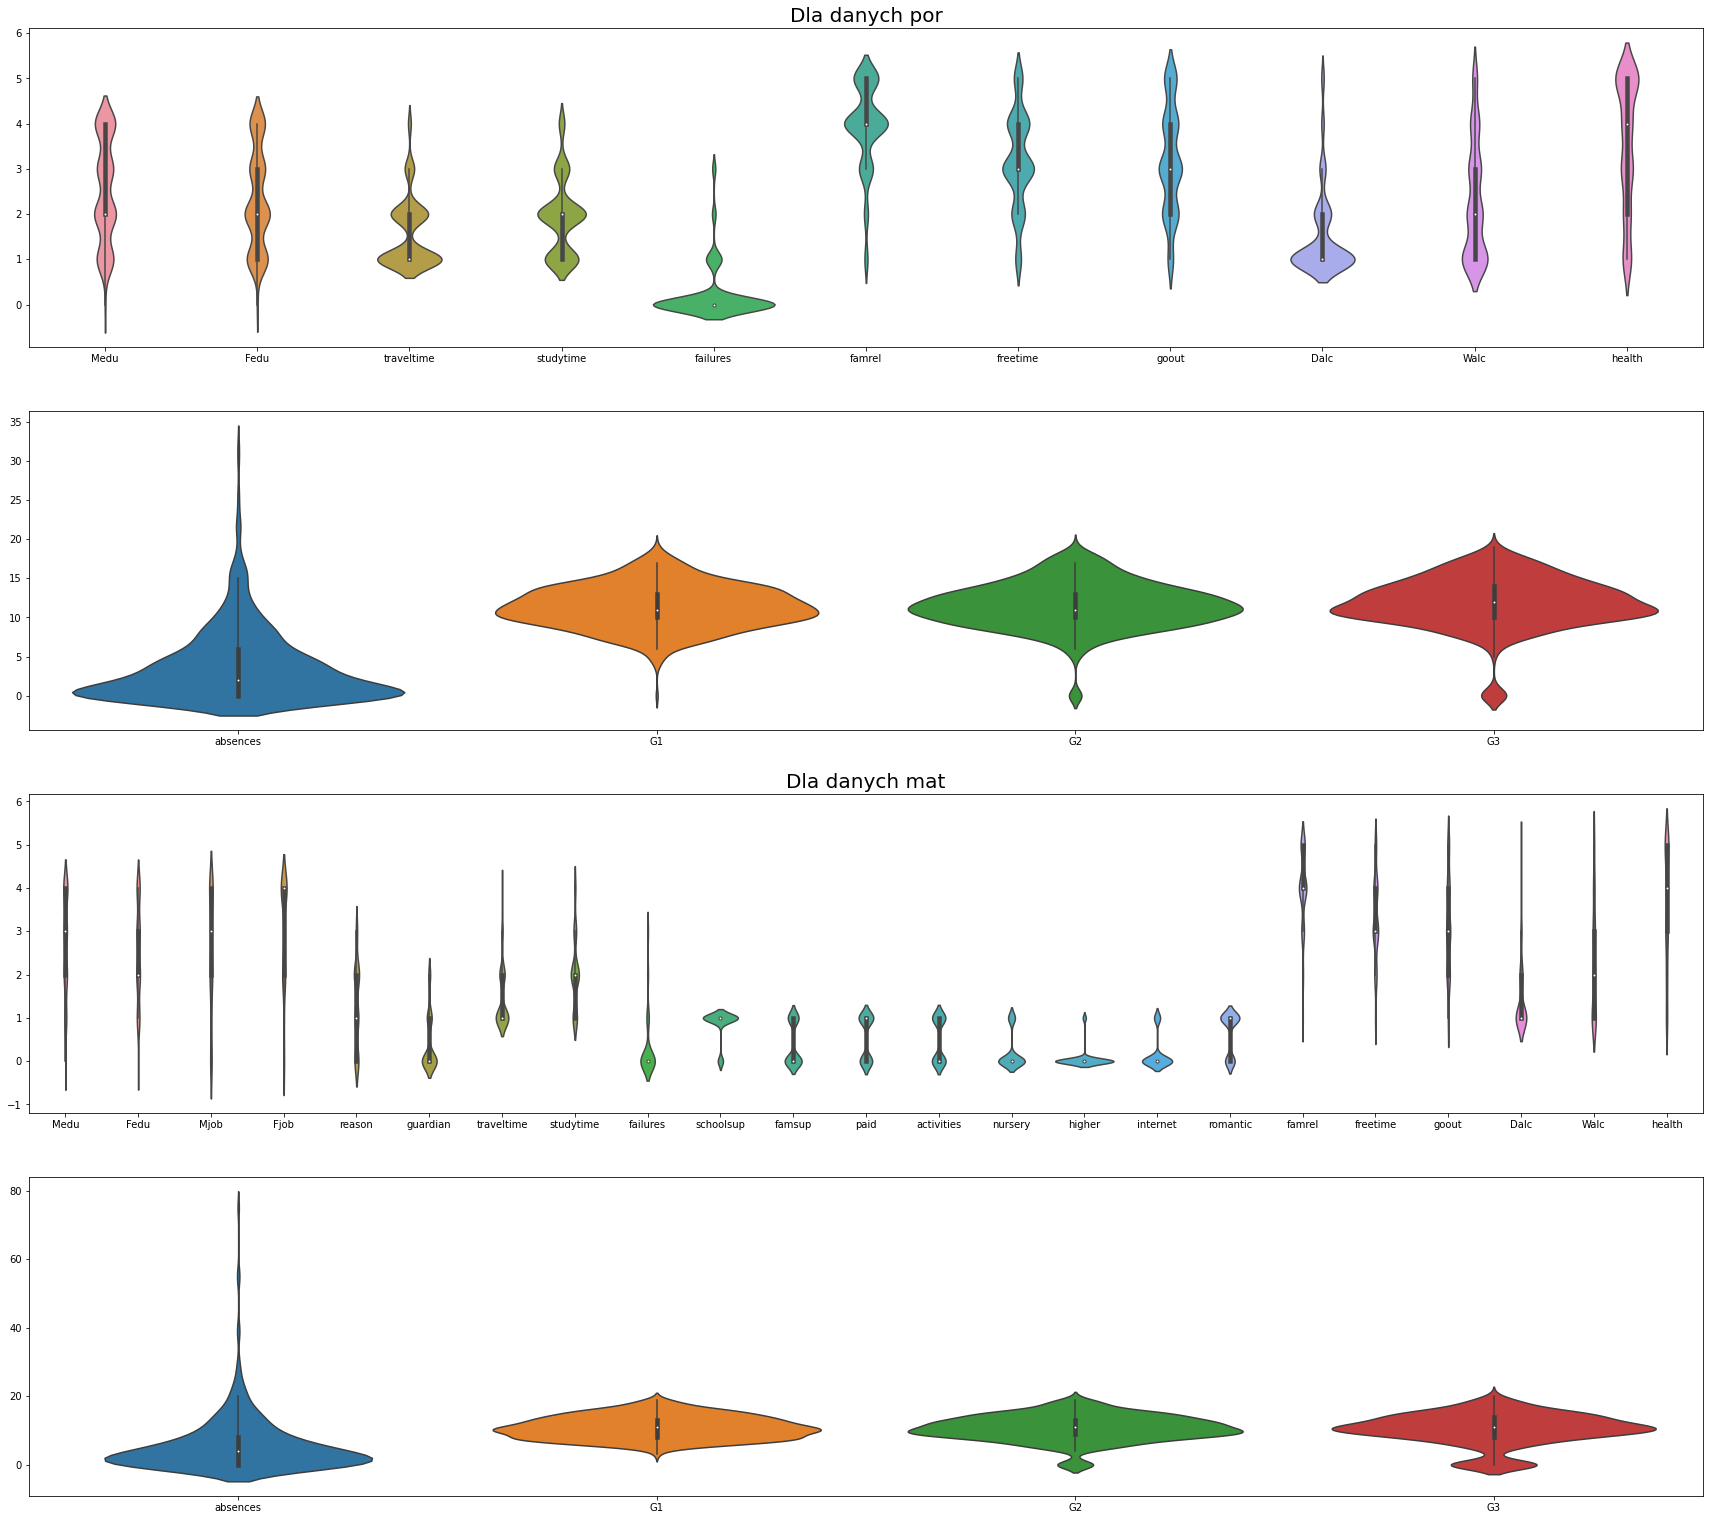

In [14]:
plt.figure(figsize=(30,27))
plt.subplot(4,1,1)
sns.violinplot(data=por.loc[:, 'Medu':'health']).set_title("Dla danych por", fontsize=20)
plt.subplot(4,1,2)
sns.violinplot(data=por.loc[:, 'absences':'G3'])
plt.subplot(4,1,3)
sns.violinplot(data=mat.loc[:, 'Medu':'health']).set_title("Dla danych mat", fontsize=20)
plt.subplot(4,1,4)
sns.violinplot(data=mat.loc[:, 'absences':'G3'])

Widać, że dane są w różnych skalach. Nie ma żadnych punktów odstających, oprócz atrybutu 'absences', który wyraża nieobecność studentów. Również, różnica w danych zbiorów 'por' i 'mat' jest mało zauważalna, chociaż istnieje.
Wykresy skrzypcowe jak i miary rozrzutu wskazują na małą liczbę niezaliczeń tych kursów. Czas spędzony w podróżach i spożycie alkoholu w dni powszechne wydzielają się małymi wartościami.
Co do ocen, nie widać wyraźnej mody, jedyne co można powiedzieć, to jest to że większość ocen jest na poziomie dostatecznym.

<AxesSubplot:>

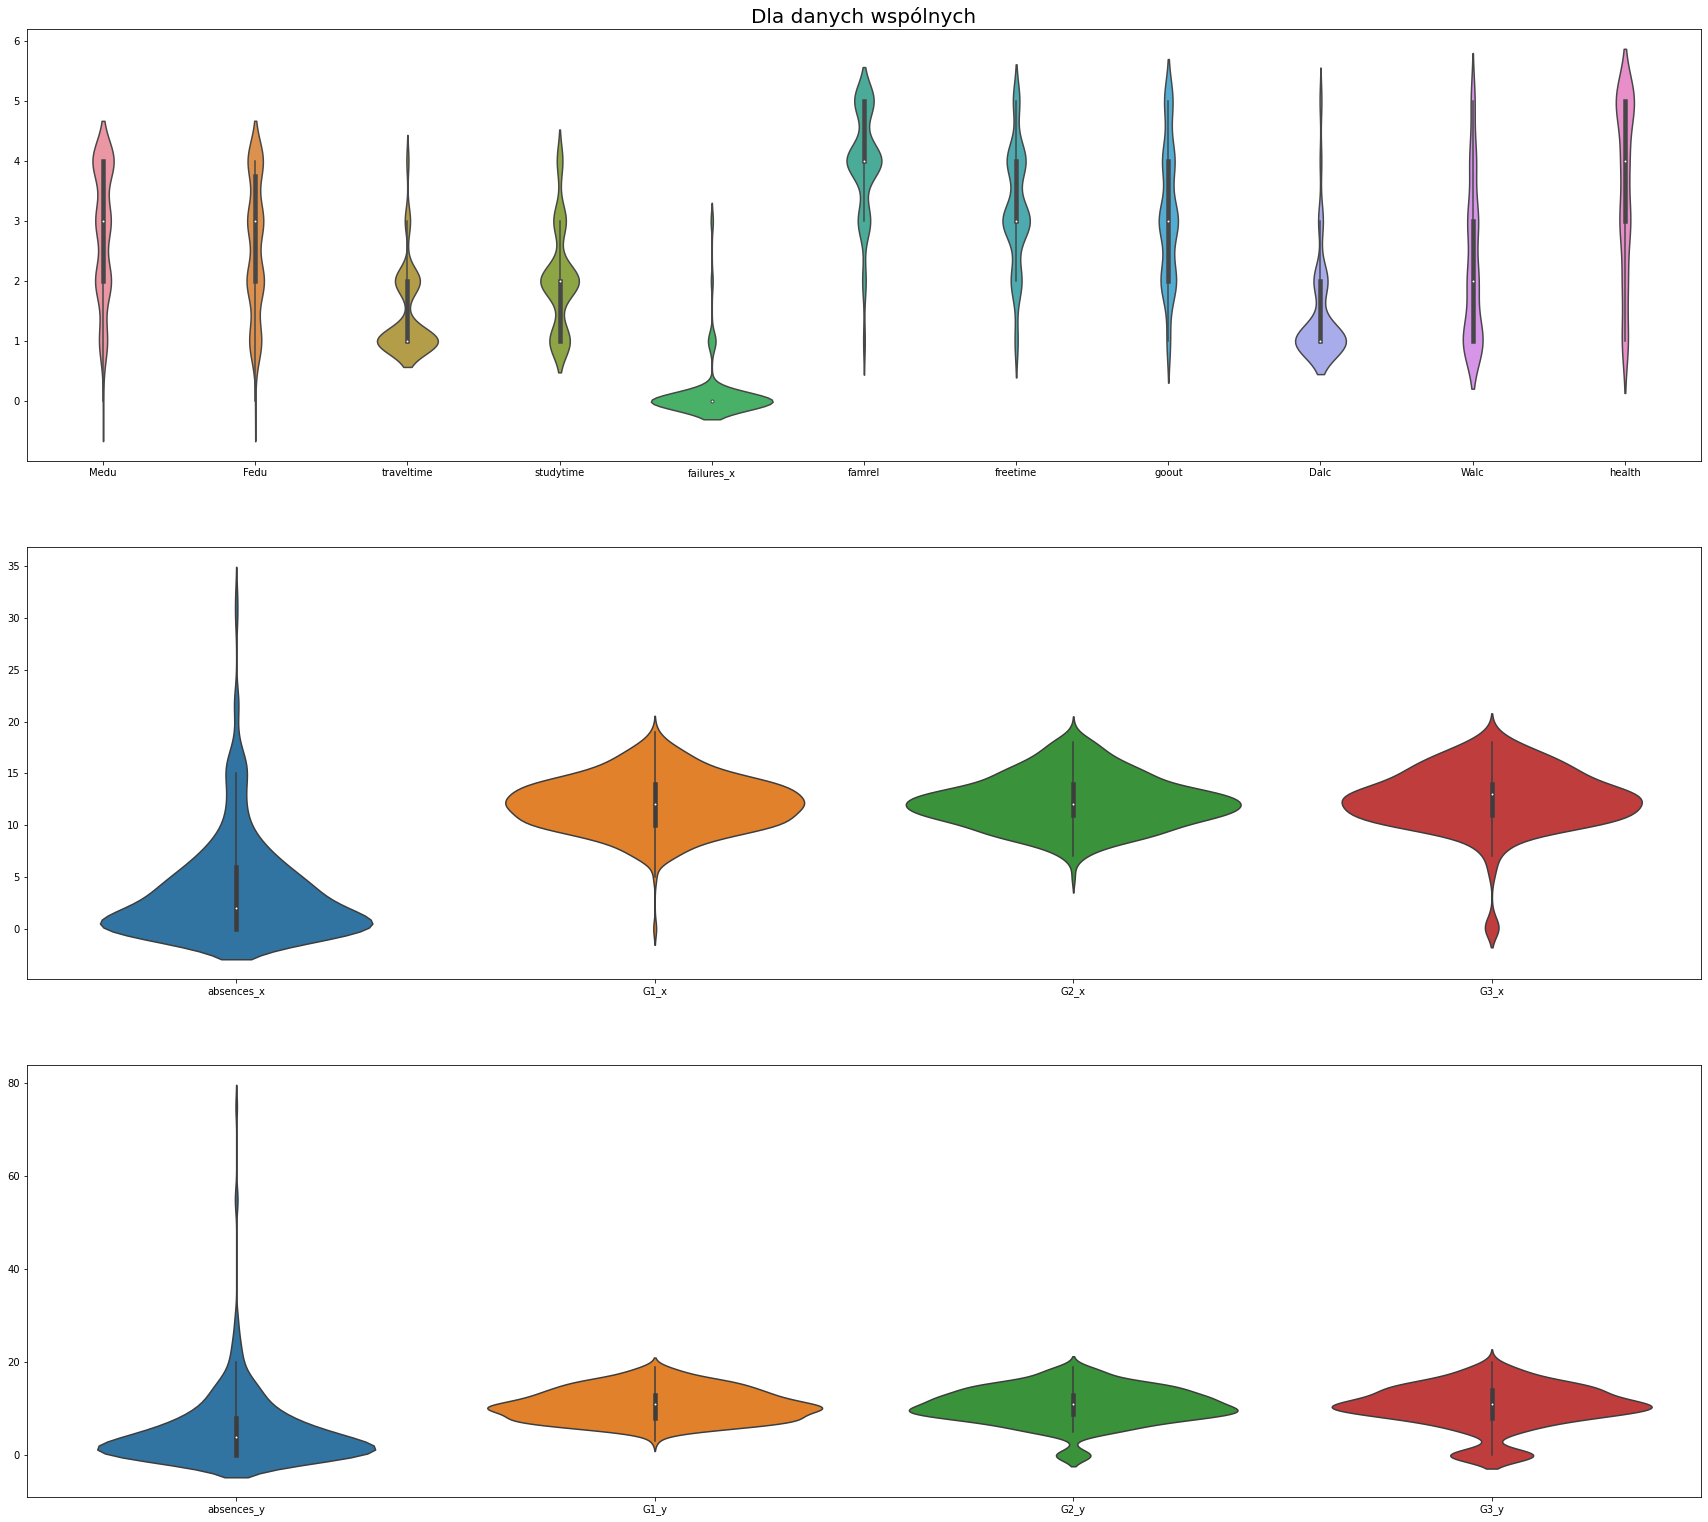

In [25]:
plt.figure(figsize=(30,27))
plt.subplot(3,1,1)
sns.violinplot(data=gr_common.loc[:, 'Medu':'health']).set_title("Dla danych wspólnych", fontsize=20)
plt.subplot(3,1,2)
sns.violinplot(data=gr_common.loc[:, 'absences_x':'G3_x'])
plt.subplot(3,1,3)
sns.violinplot(data=gr_common.loc[:, 'absences_y':'G3_y'])

Text(0.5, 1.0, 'Age of students by sex ')

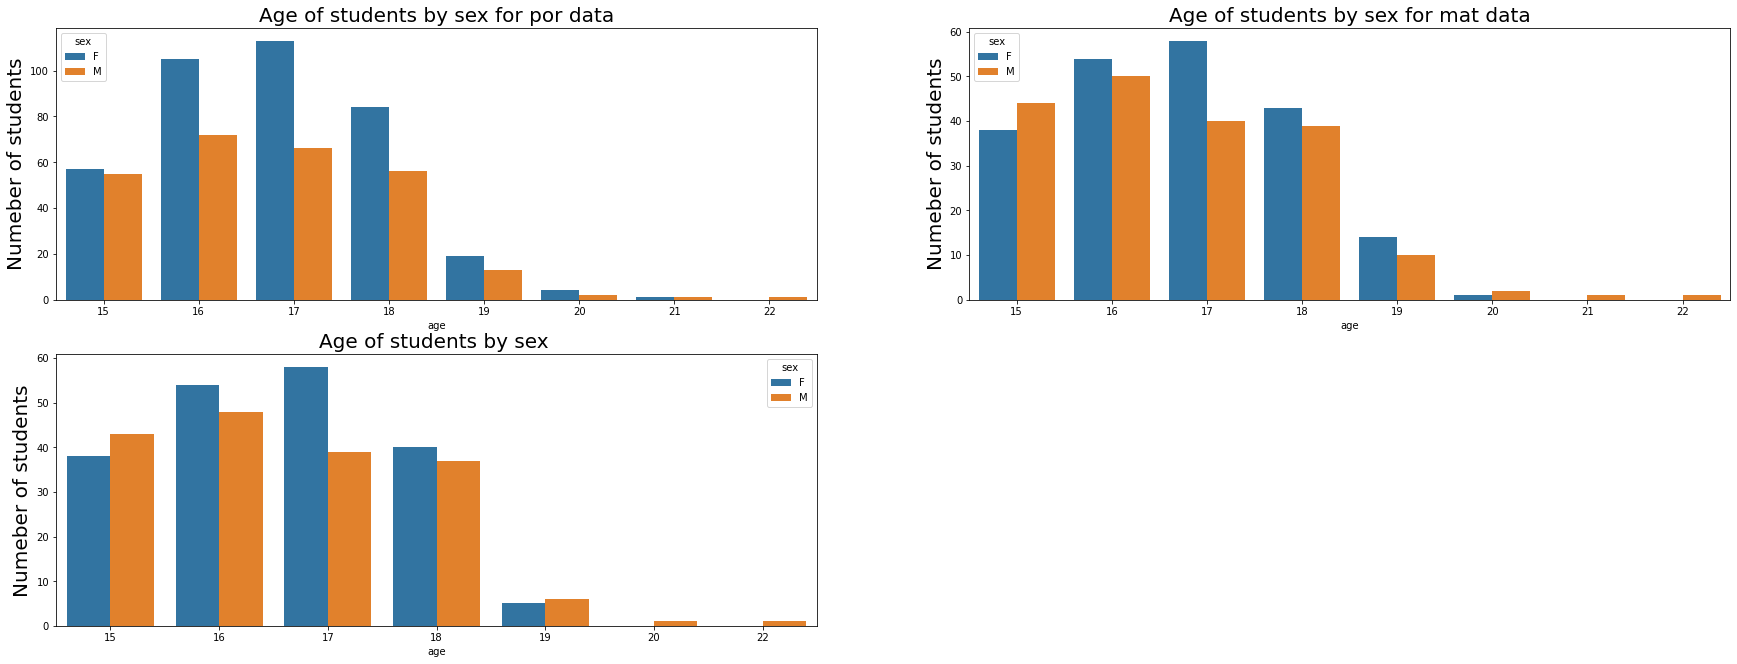

In [26]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
sns.countplot('age', data=por, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Age of students by sex for por data', fontsize=20)
plt.subplot(3, 2, 2)
sns.countplot('age', data=mat, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Age of students by sex for mat data', fontsize=20)
plt.subplot(3, 2, 3)
sns.countplot('age', data=gr_common, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Age of students by sex ', fontsize=20)

Widać, że najwięcej studentów jest w wieku od 15 do 18 lat. Poza tym, z wykresów można zauważyć, że dziewczyn spośród uczniów jest więcej.

______________________________________________Dla danych mat_________________________________________________________


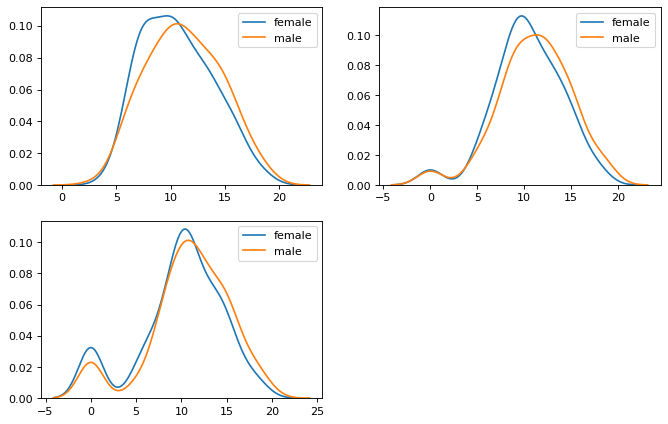

In [27]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3, 2, 1)
sns.kdeplot(mat.loc[mat.sex == 'F', 'G1'], label="female")
sns.kdeplot(mat.loc[mat.sex == 'M', 'G1'], label="male")
plt.legend();
plt.subplot(3, 2, 2)
sns.kdeplot(mat.loc[mat.sex == 'F', 'G2'], label="female")
sns.kdeplot(mat.loc[mat.sex == 'M', 'G2'], label="male")
plt.legend();
plt.subplot(3, 2, 3)
sns.kdeplot(mat.loc[mat.sex == 'F', 'G3'], label="female")
sns.kdeplot(mat.loc[mat.sex == 'M', 'G3'], label="male")
plt.legend();
print("______________________________________________Dla danych mat_________________________________________________________")

Dana analiza określa różnice w ocenach G1, G2 oraz G3 na podstawie płci uczniów dla danych z kursu matematyki. Różnica jest mało zauważalna, ale istnieje, co może wynikać z różnicy pomiędzy liczbą dziewczyn a chłopców wśród uczniów.

______________________________________________Dla danych por_________________________________________


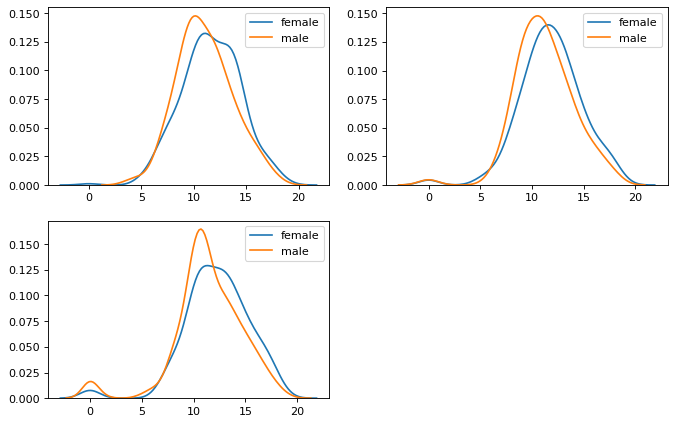

In [28]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3, 2, 1)
sns.kdeplot(por.loc[por.sex == 'F', 'G1'], label="female")
sns.kdeplot(por.loc[por.sex == 'M', 'G1'], label="male")
plt.legend();
plt.subplot(3, 2, 2)
sns.kdeplot(por.loc[por.sex == 'F', 'G2'], label="female")
sns.kdeplot(por.loc[por.sex == 'M', 'G2'], label="male")
plt.legend();
plt.subplot(3, 2, 3)
sns.kdeplot(por.loc[por.sex == 'F', 'G3'], label="female")
sns.kdeplot(por.loc[por.sex == 'M', 'G3'], label="male")
plt.legend();
print("______________________________________________Dla danych por_________________________________________")

Podobną tendencję co poprzednio można zauważyć i w tej grupie wykresów.

Text(0.5, 1.0, 'Grades for math')

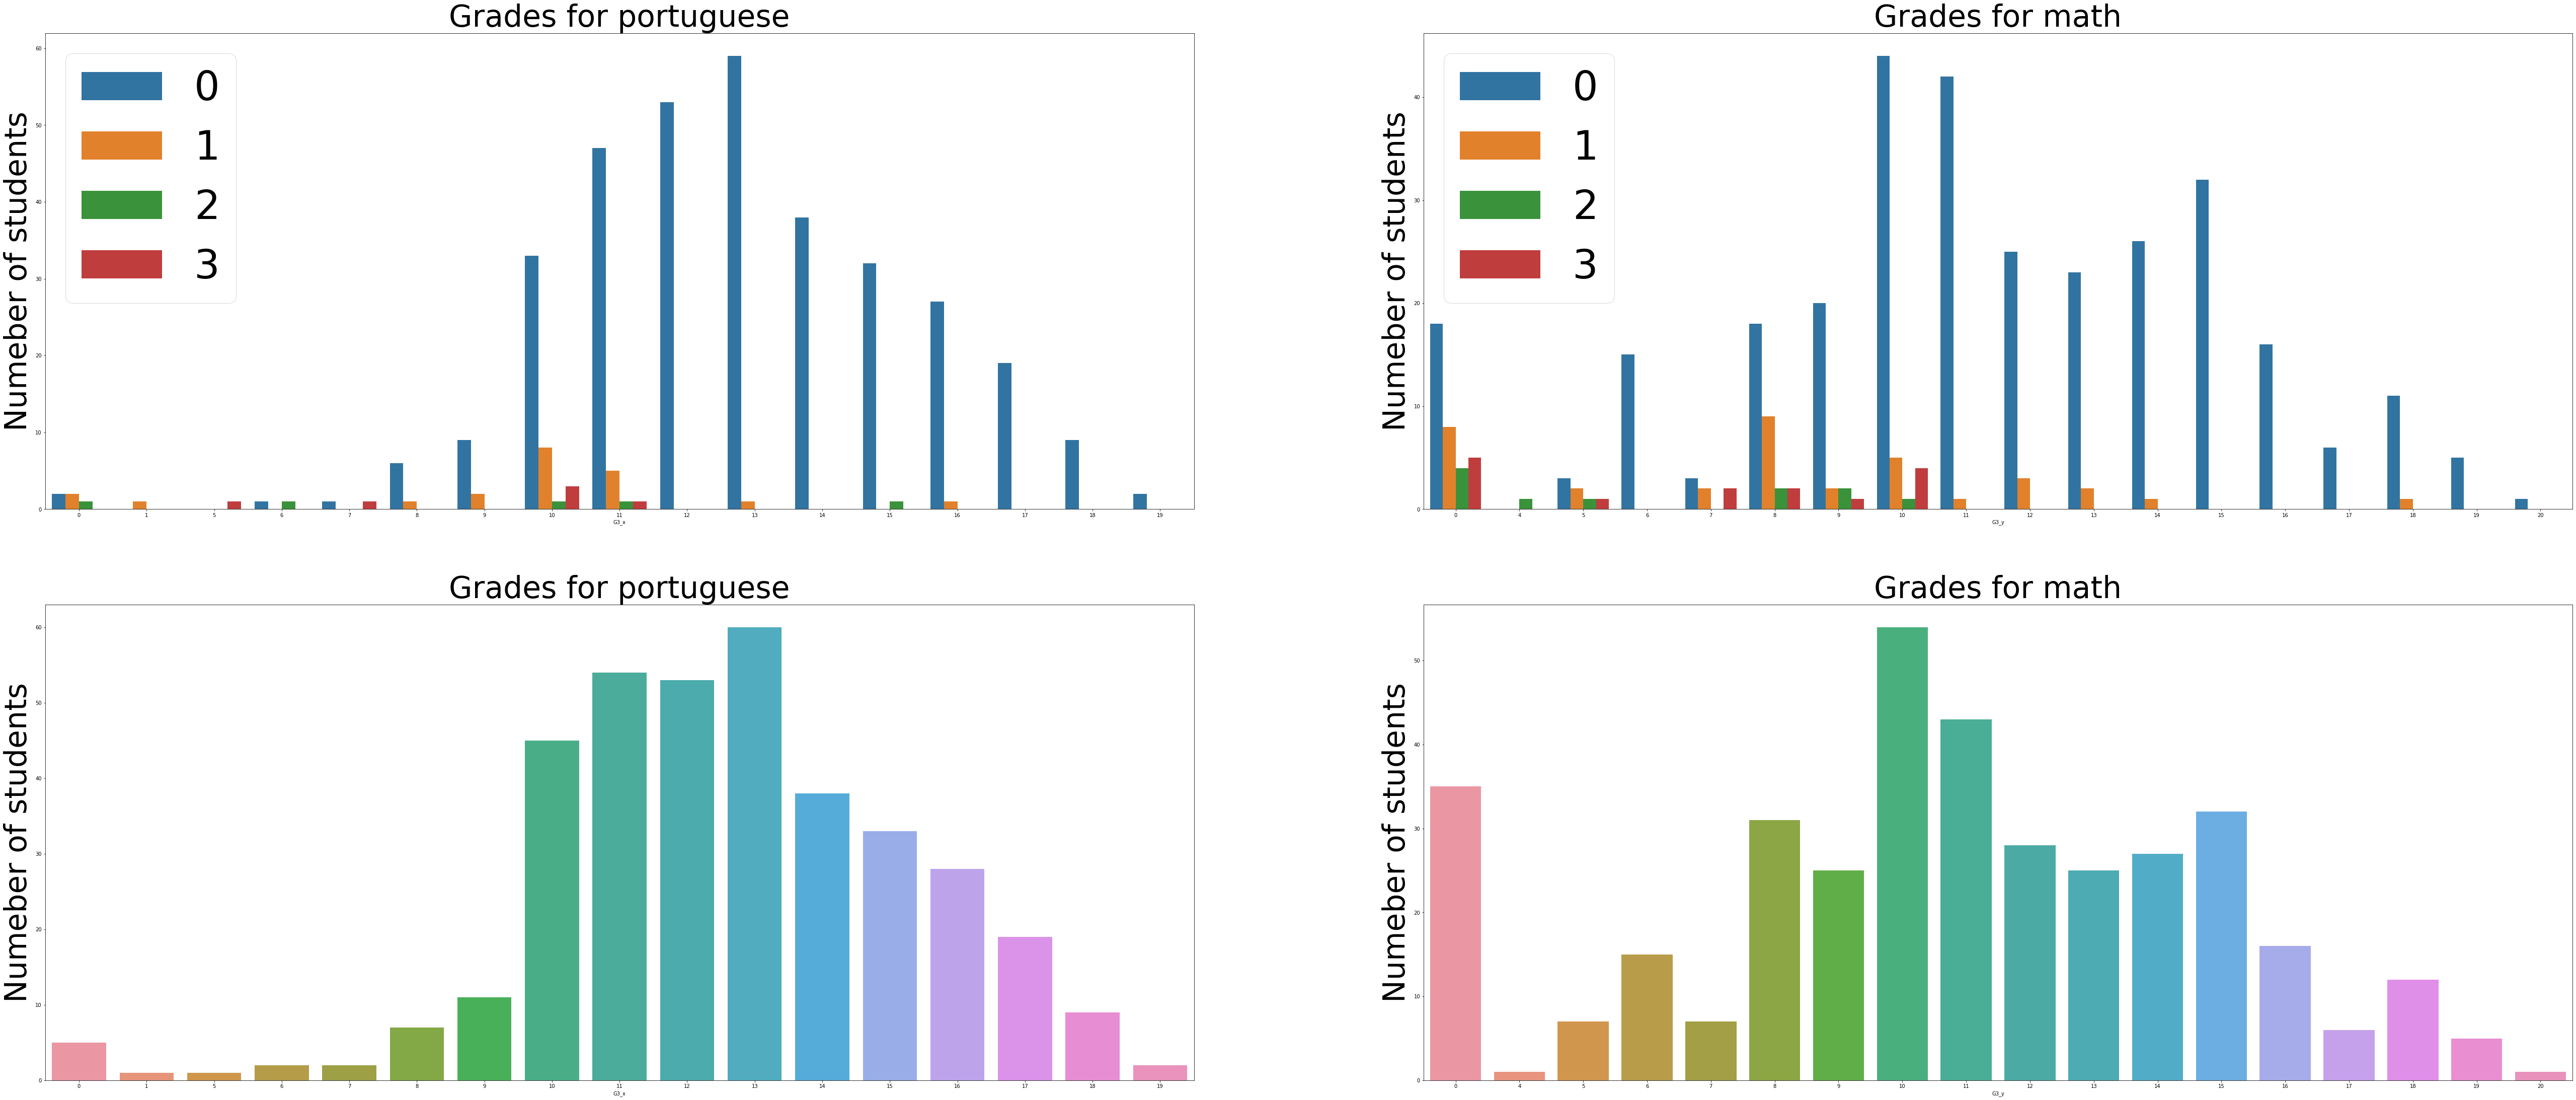

In [29]:
plt.figure(figsize=(90,80))
plt.subplot(4, 2, 1)
sns.countplot('G3_x', data=gr_common, hue = 'failures_x')
plt.ylabel('Numeber of students', fontsize=60)
plt.title('Grades for portuguese', fontsize=60)
plt.legend(loc=2, prop={'size': 80})
plt.subplot(4, 2, 2)
sns.countplot('G3_y', data=gr_common, hue = 'failures_y')
plt.ylabel('Numeber of students', fontsize=60)
plt.title('Grades for math', fontsize=60)
plt.legend(loc=2, prop={'size': 80})
plt.subplot(4, 2, 3)
sns.countplot('G3_x', data=gr_common)
plt.ylabel('Numeber of students', fontsize=60)
plt.title('Grades for portuguese', fontsize=60)
plt.subplot(4, 2, 4)
sns.countplot('G3_y', data=gr_common)
plt.ylabel('Numeber of students', fontsize=60)
plt.title('Grades for math', fontsize=60)

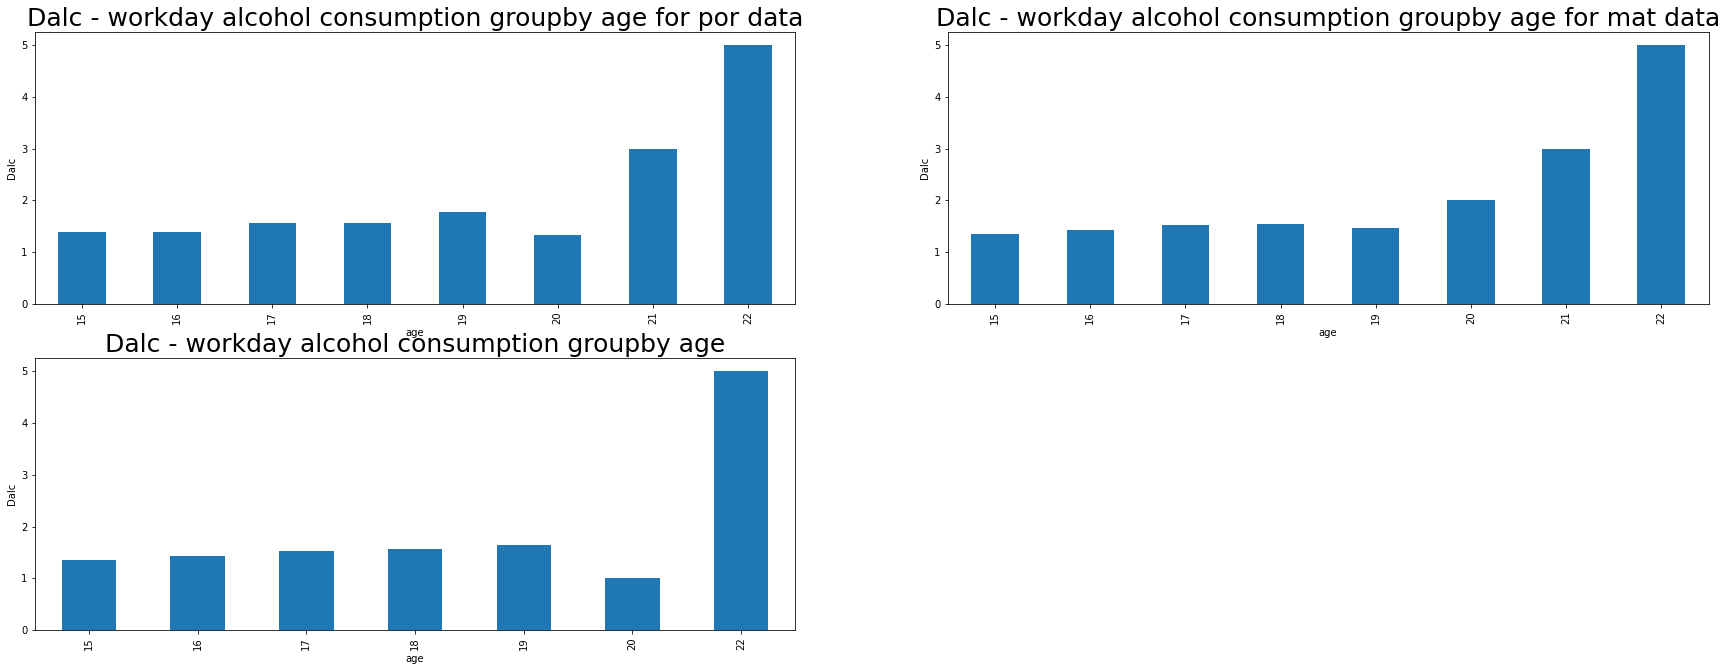

In [31]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
ax = por.groupby('age').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age for por data')
plt.ylabel('Dalc')
ax.title.set_fontsize(25)
plt.subplot(3, 2, 2)
bx = mat.groupby('age').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age for mat data')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)
plt.subplot(3, 2, 3)
bx = gr_common.groupby('age').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)

Wykresy przedstawiają średnie spożycie alkoholu przez uczniów w dni robocze w zależności od wieku. Cecha Dalc jest atrybutem numerycznym, gdzie 1 oznacza bardzo niskie spożycie alkoholu, a 5 bardzo wysokie. Widać wzrost spożycia alkoholu w dni powszechne przez studentów w starszym wieku. 

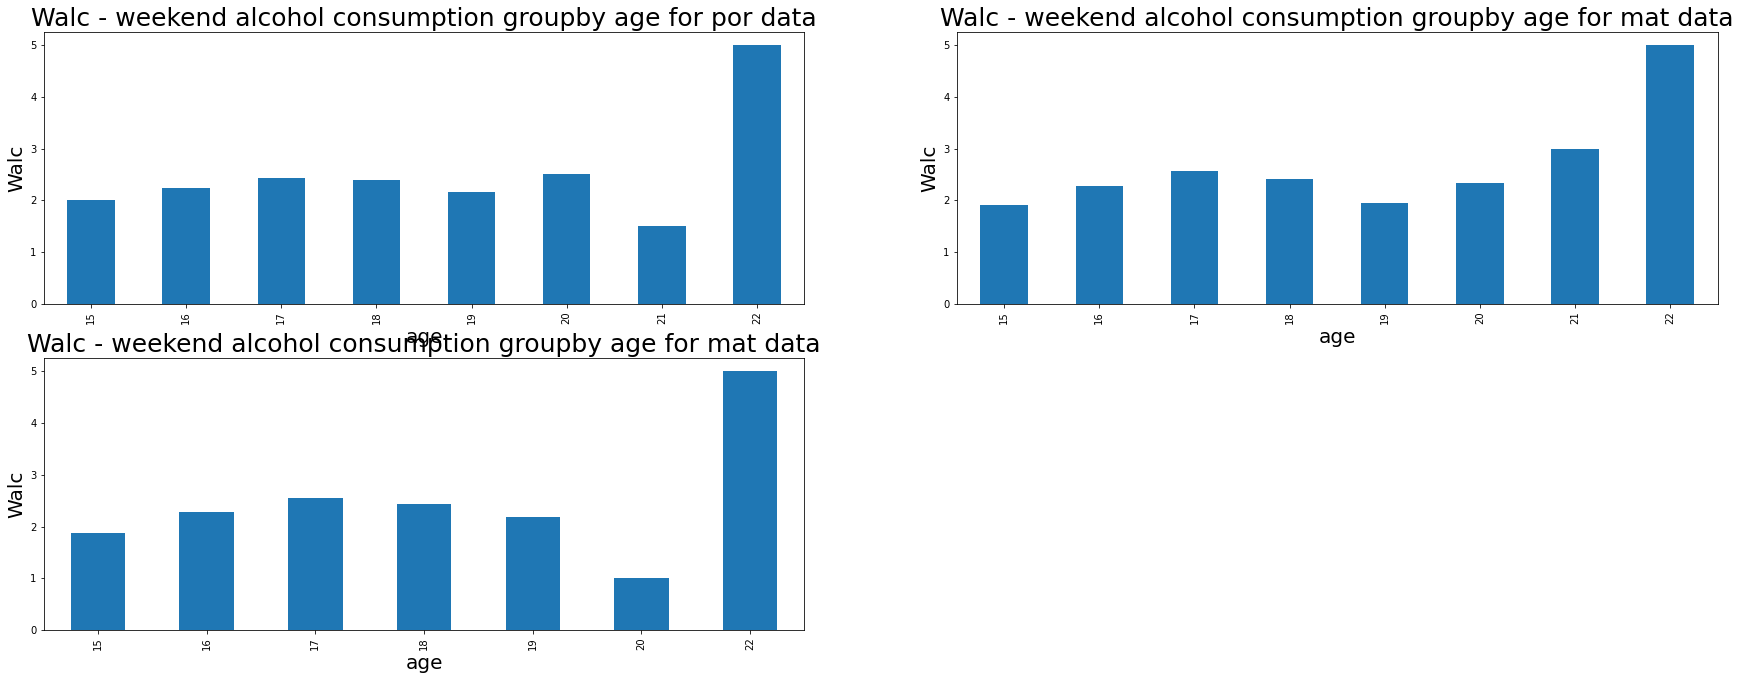

In [32]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
ax = por.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for por data')
plt.ylabel('Walc')
ax.title.set_fontsize(25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.subplot(3, 2, 2)
bx = mat.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)
plt.subplot(3, 2, 3)
bx = gr_common.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)

Z kolei ta grupa wykresów przedstawia średnią spożycia alkoholu przez studentów w weekend i od razu widać wzrost tej liczby  (cecha Walc definiuje się analogicznie). Ogólnie, odczytuje się podobna tendencja, co poprzednio.

Text(0.5, 1.0, 'Dalc of students by sex')

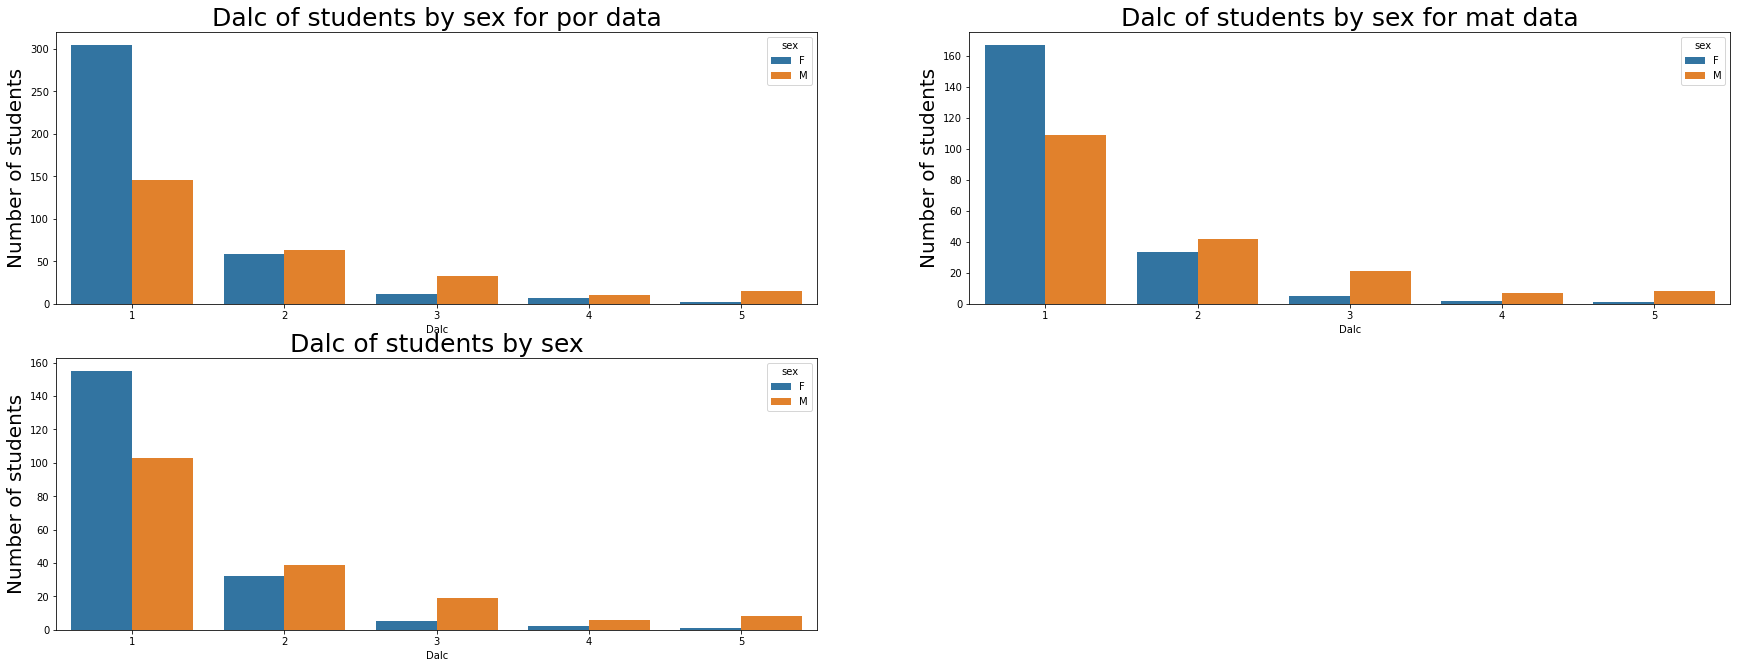

In [33]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
sns.countplot('Dalc', data=por, hue='sex')
plt.ylabel('Number of students', fontsize=20)
plt.title('Dalc of students by sex for por data', fontsize=25)
plt.subplot(3, 2, 2)
sns.countplot('Dalc', data=mat, hue='sex')
plt.ylabel('Number of students', fontsize=20)
plt.title('Dalc of students by sex for mat data', fontsize=25)
plt.subplot(3, 2, 3)
sns.countplot('Dalc', data=gr_common, hue='sex')
plt.ylabel('Number of students', fontsize=20)
plt.title('Dalc of students by sex', fontsize=25)

Na tych wykresach chcemy przeanalizować zależność spożycia alkoholu w dni powszechne z punktu widzenia
płci. Możemy wywnioskować, że więcej dziewczyn pozostaje w grupie 1 (niskie spożycie alkoholu), lecz w innych grupach, z wyższym spożyciem alkoholu ilościowo przeważają chłopaki.

Text(0.5, 1.0, 'Walc of students by sex')

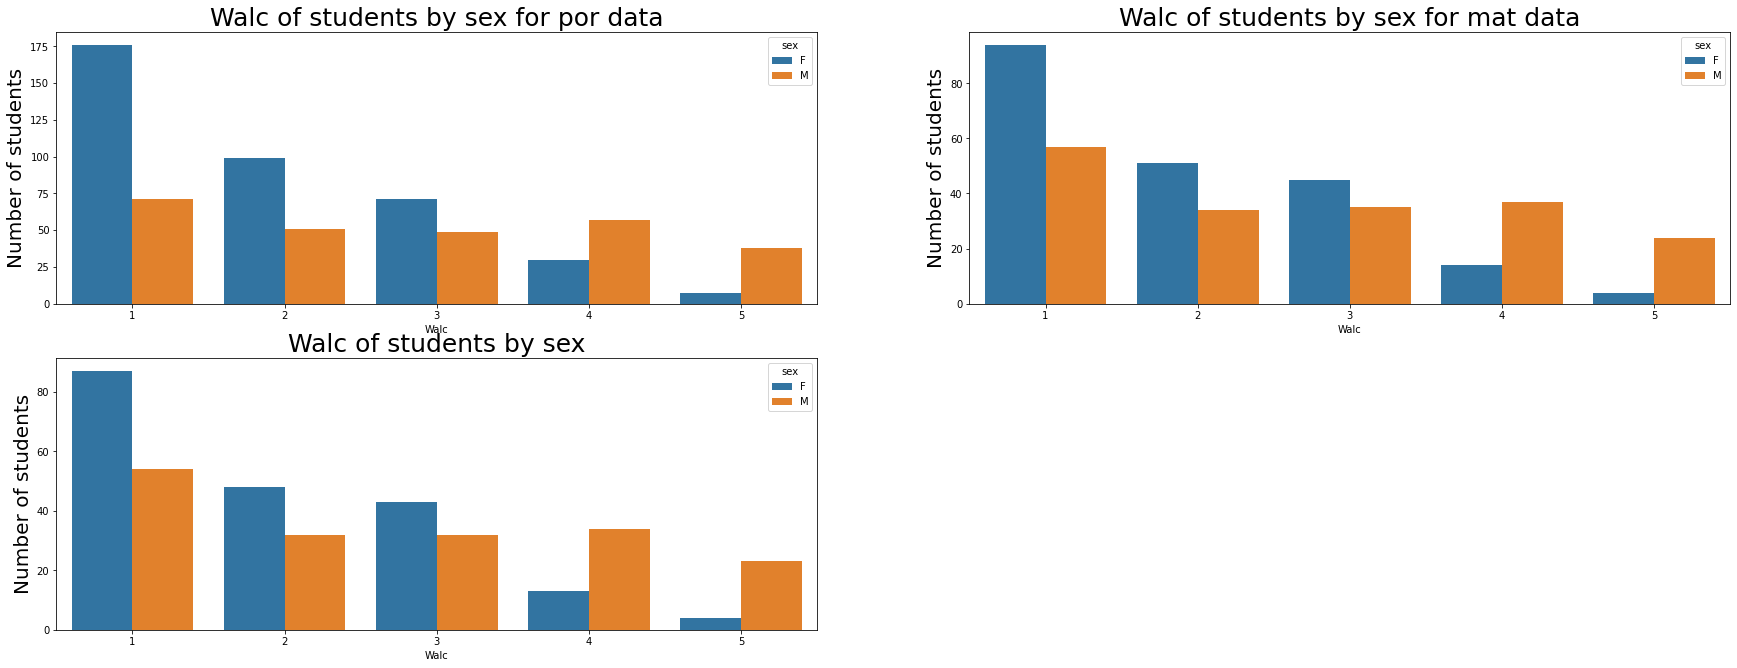

In [34]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
sns.countplot('Walc', data=por, hue='sex')
plt.ylabel('Number of students', fontsize=20)
plt.title('Walc of students by sex for por data', fontsize=25)
plt.subplot(3, 2, 2)
sns.countplot('Walc', data=mat, hue='sex')
plt.ylabel('Number of students', fontsize=20)
plt.title('Walc of students by sex for mat data', fontsize=25)
plt.subplot(3, 2, 3)
sns.countplot('Walc', data=gr_common, hue='sex')
plt.ylabel('Number of students', fontsize=20)
plt.title('Walc of students by sex', fontsize=25)

Na ogół, w weekendy, uczniowie spożywają więcej alkoholu, niż w dni robocze. Z kolei na tej parie wykresów widać, że w grupach 1-3 przewagę mają dziewczyny.

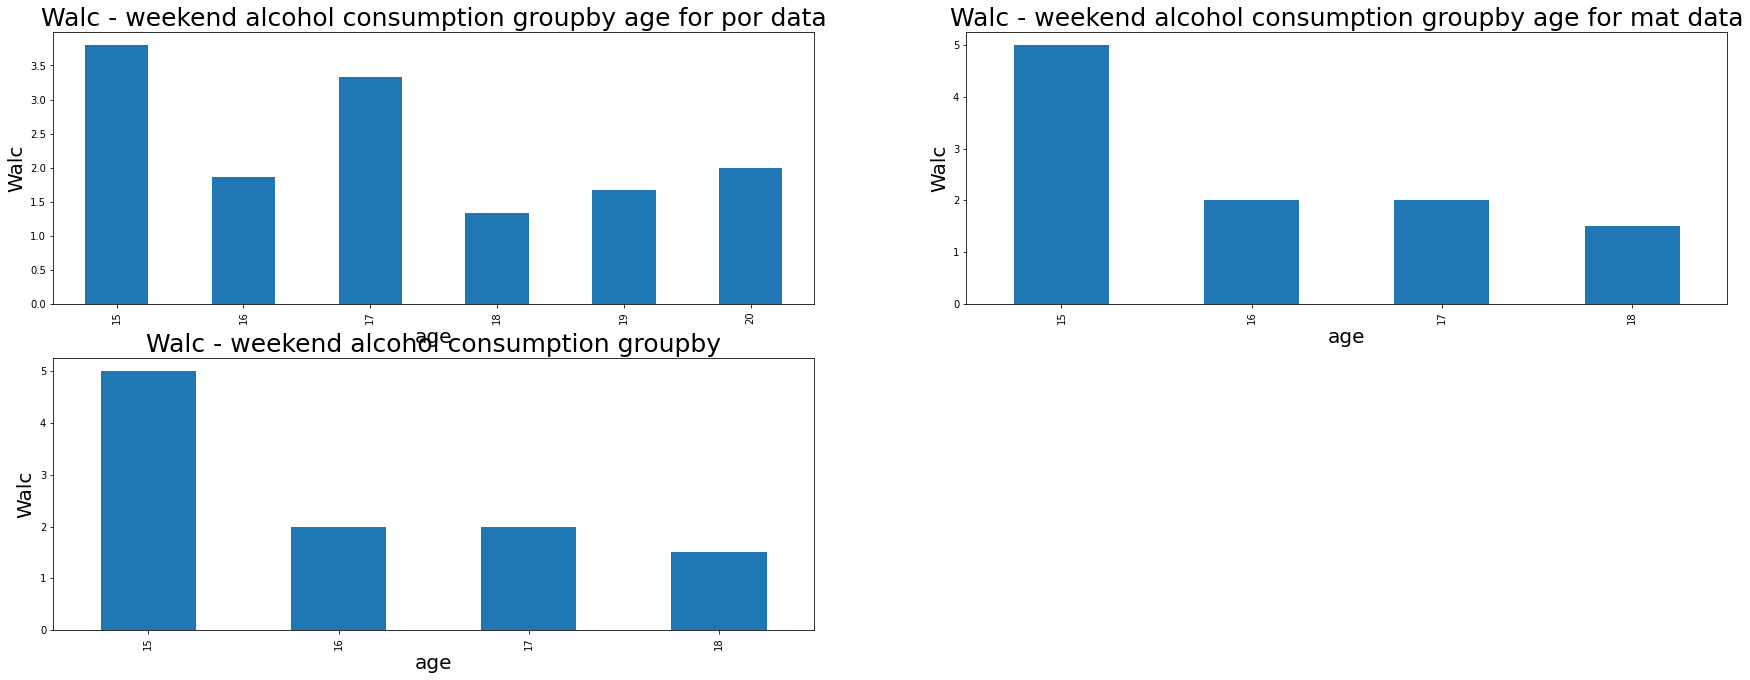

In [35]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
dat = mat[mat.famrel ==1]
pat = por[por.famrel ==1]
gr = gr_common[gr_common.famrel == 1]
ax = pat.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for por data')
plt.ylabel('Walc')
ax.title.set_fontsize(25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.subplot(3, 2, 2)
bx = dat.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)
plt.subplot(3, 2, 3)
bx = gr.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby')
plt.ylabel('Walc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)

Powyższy wykres ilustruje ile studentów w rodzinach z niskim poziomem relacji spozywają alkoholu w weekendy, gdzie wyraźnie widać, że uczniowie w wieku 15 lat spozywają najwięcej.

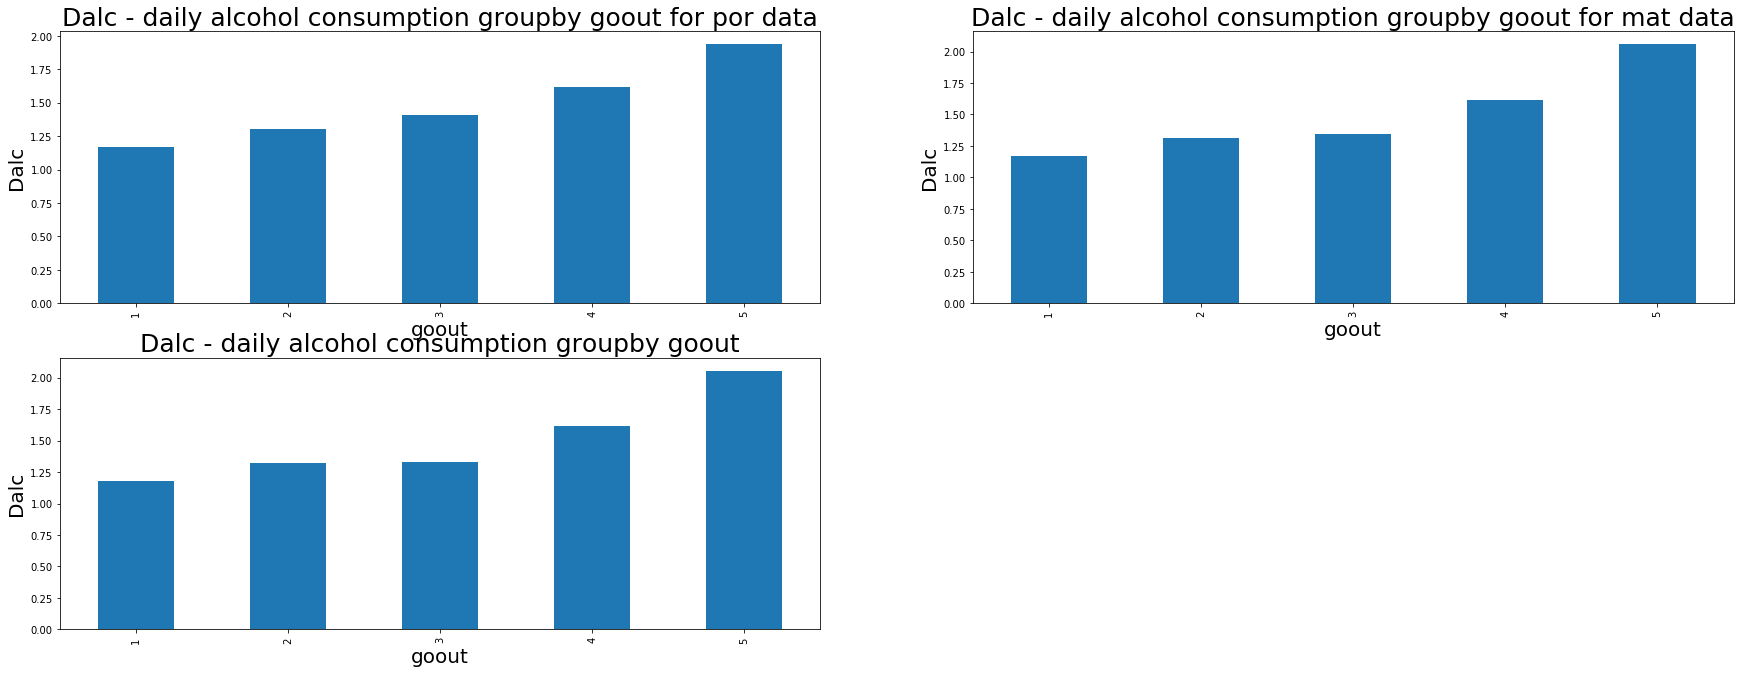

In [126]:
plt.figure(figsize=(30,17))
plt.subplot(3, 2, 1)
ax = por.groupby('goout').mean()['Dalc'].plot(kind='bar', title='Dalc - daily alcohol consumption groupby goout for por data')
plt.ylabel('Dalc')
ax.title.set_fontsize(25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.subplot(3, 2, 2)
bx = mat.groupby('goout').mean()['Dalc'].plot(kind='bar', title='Dalc - daily alcohol consumption groupby goout for mat data')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)
plt.subplot(3, 2, 3)
bx = gr_common.groupby('goout').mean()['Dalc'].plot(kind='bar', title='Dalc - daily alcohol consumption groupby goout')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)

Na tych wykresach chcemy prześledzić zależność spożycia alkoholu w dni powszechne od atrybuta, opisującego wychodzenie z przyjaciółmi, również w sposób numeryczny od 1 do 5. Widać wzrost liniowy.

Text(0.5, 1.0, 'Extra support for students from Portugese class')

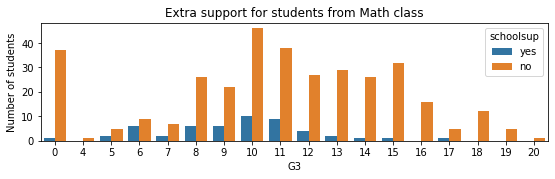

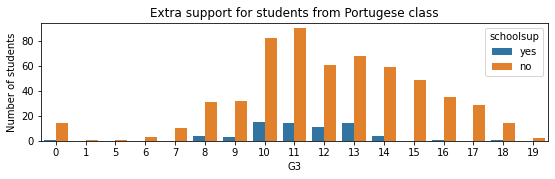

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(4, 2, 1)
sns.countplot('G3', data=mat, hue='schoolsup')
plt.ylabel('Number of students')
plt.title('Extra support for students from Math class')
plt.figure(figsize=(20, 10))
plt.subplot(4, 2, 2)
sns.countplot('G3', data=por, hue='schoolsup')
plt.ylabel('Number of students')
plt.title('Extra support for students from Portugese class')

Te wykresy demonstrują zależność oceny od wsparcia przez szkołę. Jak widać, najwięcej uczniów, dostających to wsparcie, mają ocenę dostateczną, albo poniżej dostatecznej.

Text(0.5, 1.0, 'Family support for students from Portugese class')

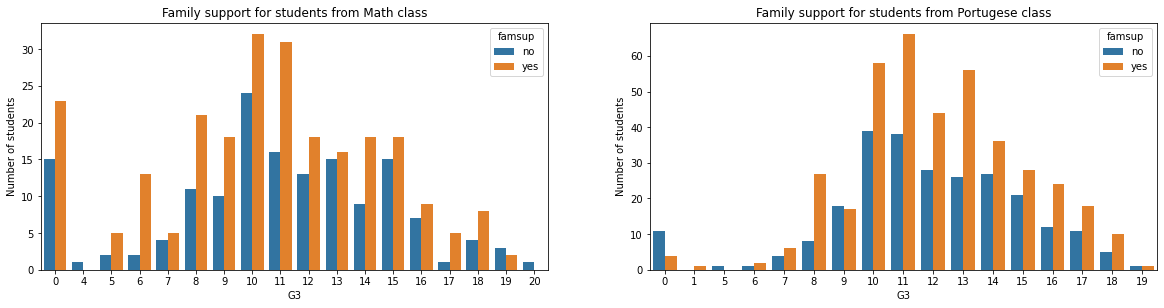

In [36]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='famsup')
plt.ylabel('Number of students')
plt.title('Family support for students from Math class')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
sns.countplot('G3', data=por, hue='famsup')
plt.ylabel('Number of students')
plt.title('Family support for students from Portugese class')

Widzimy, że oceny nie zależą od wsparcia od szkoły w danym przedmiocie, lecz potencjalnie mogą być zależne od wsparcia rodziny.

Text(0.5, 1.0, 'Failures groupby age for mat data')

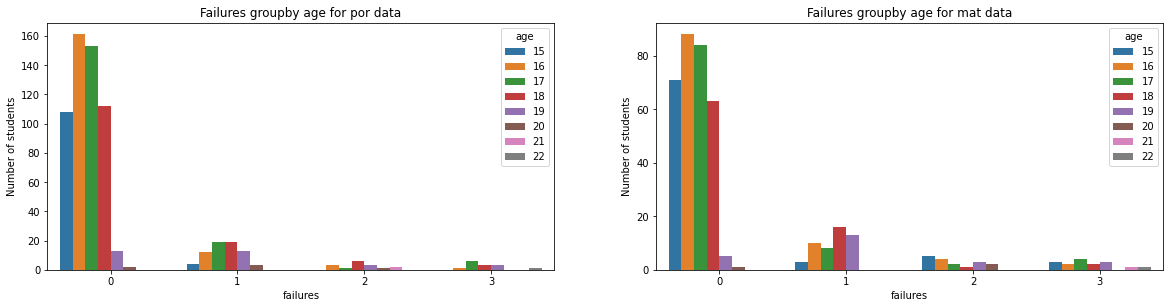

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('failures', data=por, hue='age')
plt.ylabel('Number of students')
plt.title('Failures groupby age for por data')
plt.subplot(2, 2, 2)
sns.countplot('failures', data=mat, hue='age')
plt.ylabel('Number of students')
plt.title('Failures groupby age for mat data')

Dane wykresy wyświetlają dane o niepowodzeniach w zaliczeniach w zalezności od wieku studentów, gdzie ilość niezaliczeń się zmienia od 0 do 3. Najwięcej niezaliczeń posiadają studenci w wieku od 17 lat i wyżej.

Średnią z ocen jest ~11. Najwięcej uczniów, którzy mają ocenę 11 są z rodziny, gdzie rodzice posiadają ukonczone wykształcenie podtawowe (4 - 9 klasy). Natomiast wyżej niż 11 najczęściej posiadają studenci, roszice których ukonczyli wykształcenie średnie lub posiadają wyższe, czego potwierdzeniem są poniższe wykresy. 

Text(0.5, 1.0, 'Grades for Medu')

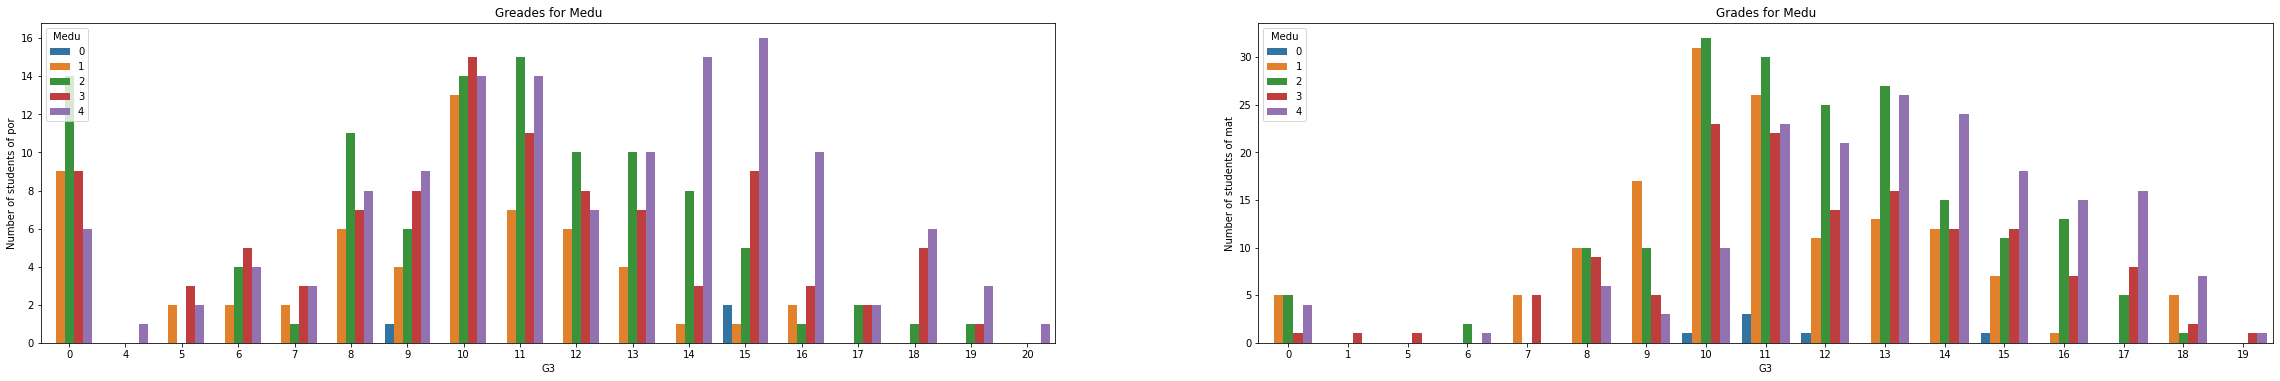

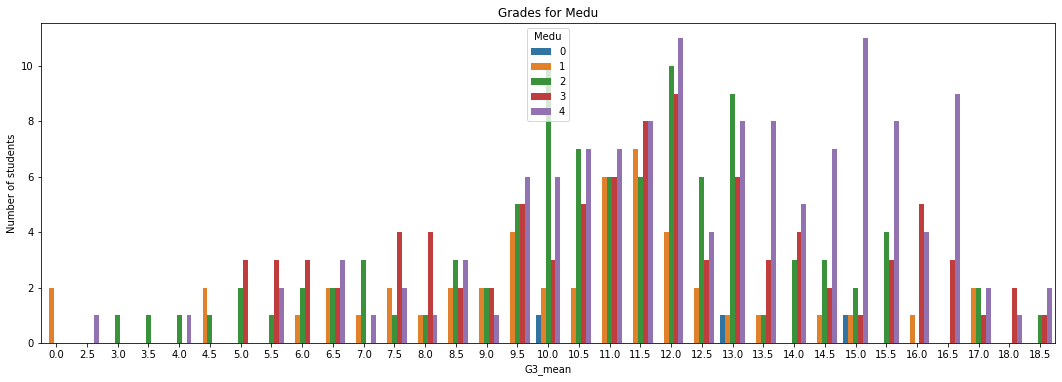

In [43]:
plt.figure(figsize=(40, 20))
plt.subplot(3, 2, 1)
sns.countplot('G3', data=mat, hue='Medu')
plt.ylabel('Number of students of por')
plt.title('Greades for Medu')
plt.subplot(3, 2, 2)
sns.countplot('G3', data=por, hue='Medu')
plt.ylabel('Number of students of mat')
plt.title('Grades for Medu')
plt.figure(figsize=(40, 20))
plt.subplot(3, 2, 3)
sns.countplot('G3_mean', data=gr_common, hue='Medu')
plt.ylabel('Number of students')
plt.title('Grades for Medu')

Analizując ocene studentów w zależnosci od wykształcenia matki, jest widoczne, że najwięcej ocen powyżej dostatecznej posiadają studenci, których matka ukończyła uczelnię wyższą. 

Text(0.5, 1.0, 'Grades for Fedu')

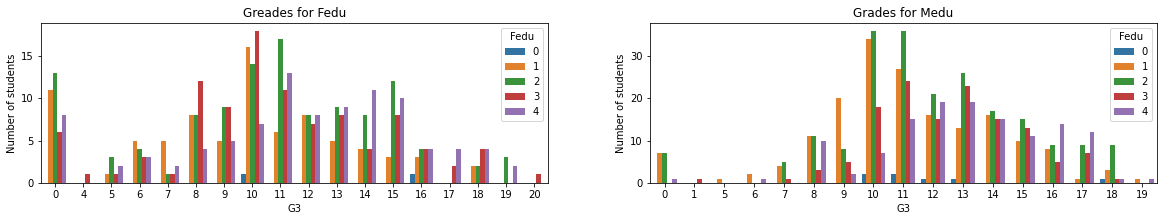

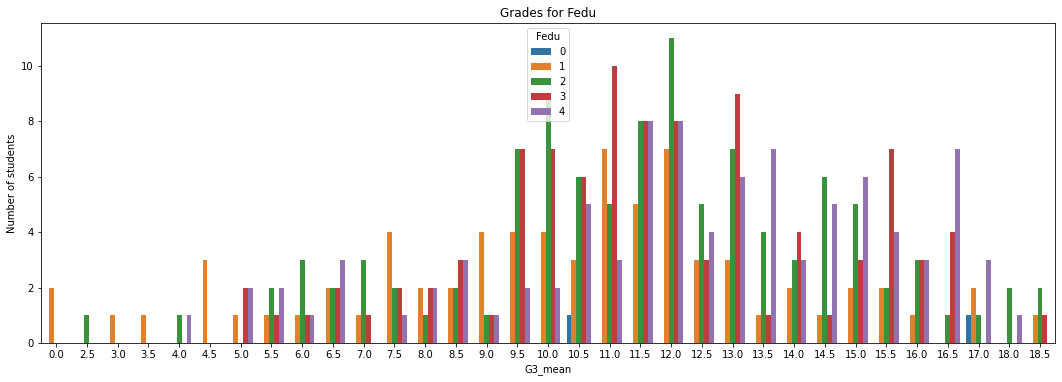

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1)
sns.countplot('G3', data=mat, hue='Fedu')
plt.ylabel('Number of students')
plt.title('Greades for Fedu')
plt.subplot(3, 2, 2)
sns.countplot('G3', data=por, hue='Fedu')
plt.ylabel('Number of students')
plt.title('Grades for Medu')
plt.figure(figsize=(40, 20))
plt.subplot(3, 2, 3)
sns.countplot('G3_mean', data=gr_common, hue='Fedu')
plt.ylabel('Number of students')
plt.title('Grades for Fedu')

Z powyższych wykresów pokazujących zależność ocen studentów od wykształcenia ojca możemy odczytać, że ojcowie studentów posiadających ocenę wyższą niż dostateczna ukończyli wykształcenie średnie i wyżej.

Text(0.5, 1.0, 'Grades for Dalc (por data)')

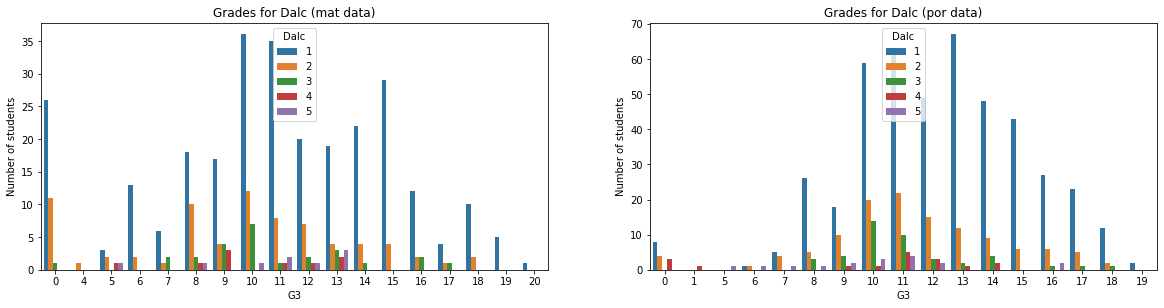

In [45]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='Dalc')
plt.ylabel('Number of students')
plt.title('Grades for Dalc (mat data)')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=por, hue='Dalc')
plt.ylabel('Number of students')
plt.title('Grades for Dalc (por data)')

Text(0.5, 1.0, 'Grades for Dalc')

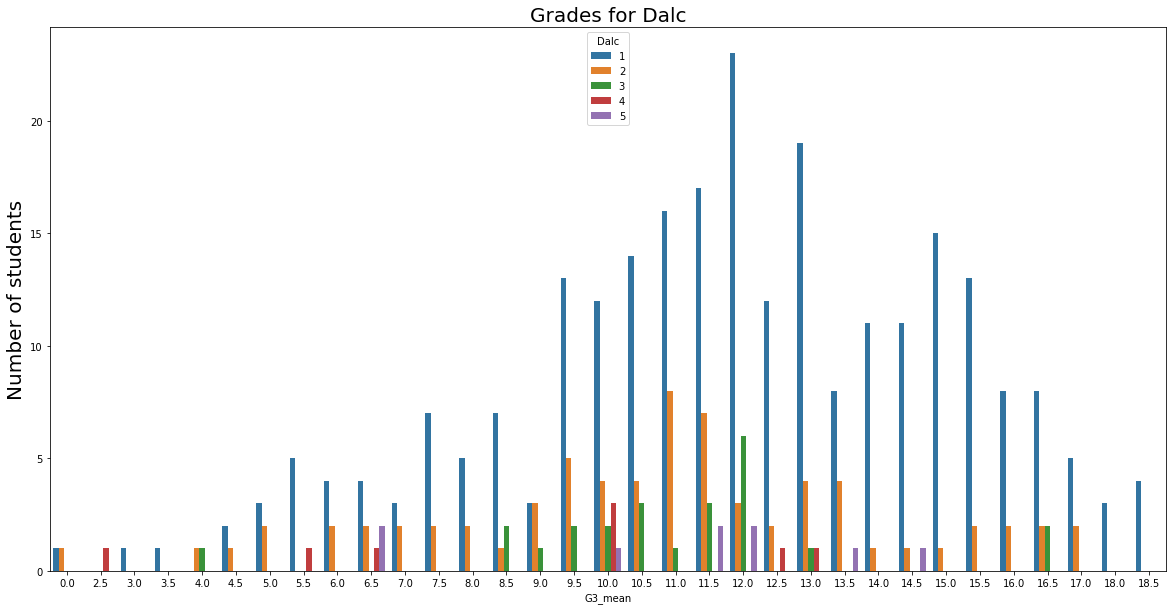

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot('G3_mean', data=gr_common, hue='Dalc')
plt.ylabel('Number of students', fontsize=20)
plt.title('Grades for Dalc', fontsize=20)

Powyższe wykresy przedstawiają zależność oceny od ilości wypitego alkoholu przez studentów w ciągu dni roboczych. Możemy prześledzić zależność, że ta liczba się zmniejsza ze wzrostem oceny, najlepiej to widać dla danych z kursu języka Portugalskiego.

Text(0.5, 1.0, 'Grades for Walc (por data)')

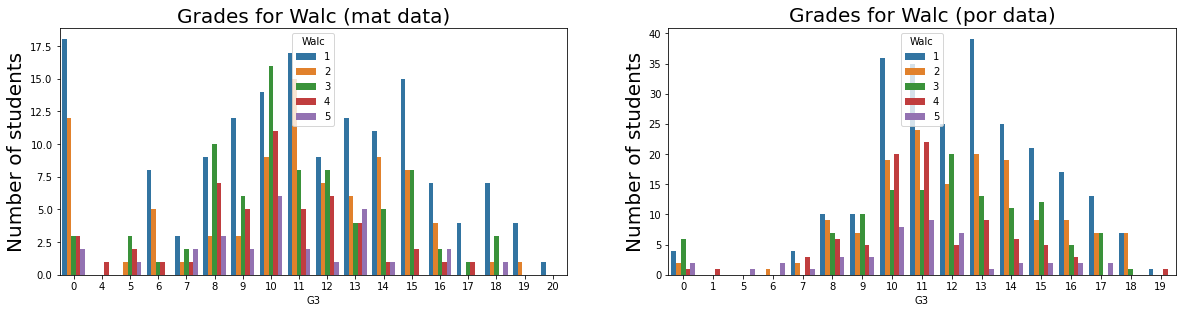

In [47]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='Walc')
plt.ylabel('Number of students', fontsize=20)
plt.title('Grades for Walc (mat data)', fontsize=20)
plt.subplot(2, 2, 2)
sns.countplot('G3', data=por, hue='Walc')
plt.ylabel('Number of students', fontsize=20)
plt.title('Grades for Walc (por data)', fontsize=20)

Text(0.5, 1.0, 'Grades for Walc (por data)')

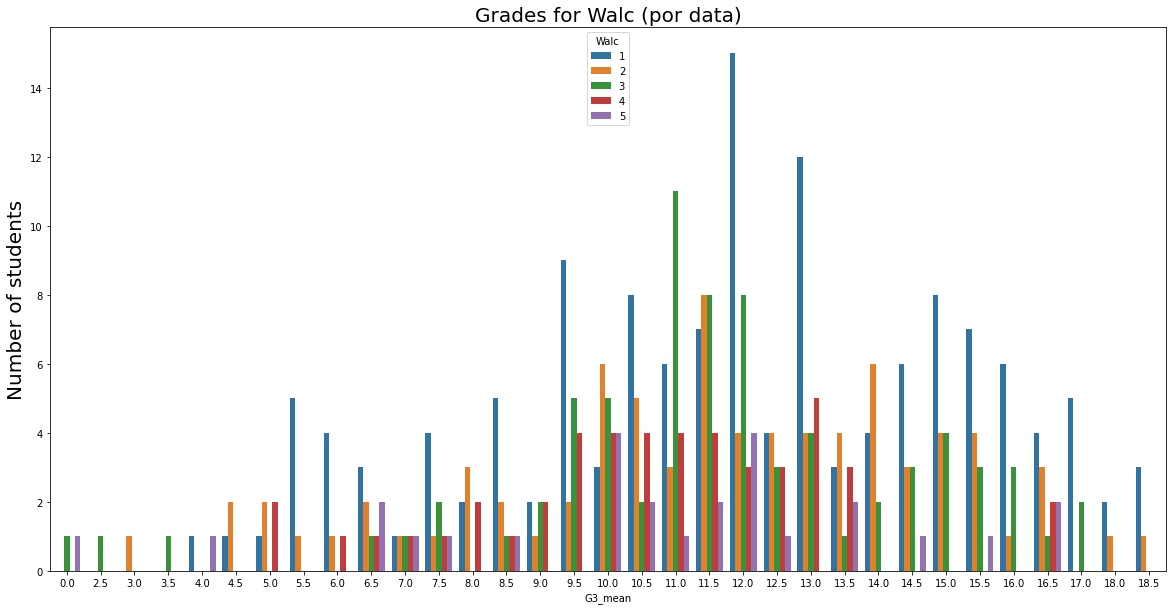

In [48]:
plt.figure(figsize=(20, 10))
sns.countplot('G3_mean', data=gr_common, hue='Walc')
plt.ylabel('Number of students', fontsize=20)
plt.title('Grades for Walc (por data)', fontsize=20)

Podobnie jest w przypadku analizy ilości alkoholu wypitego w weekend.

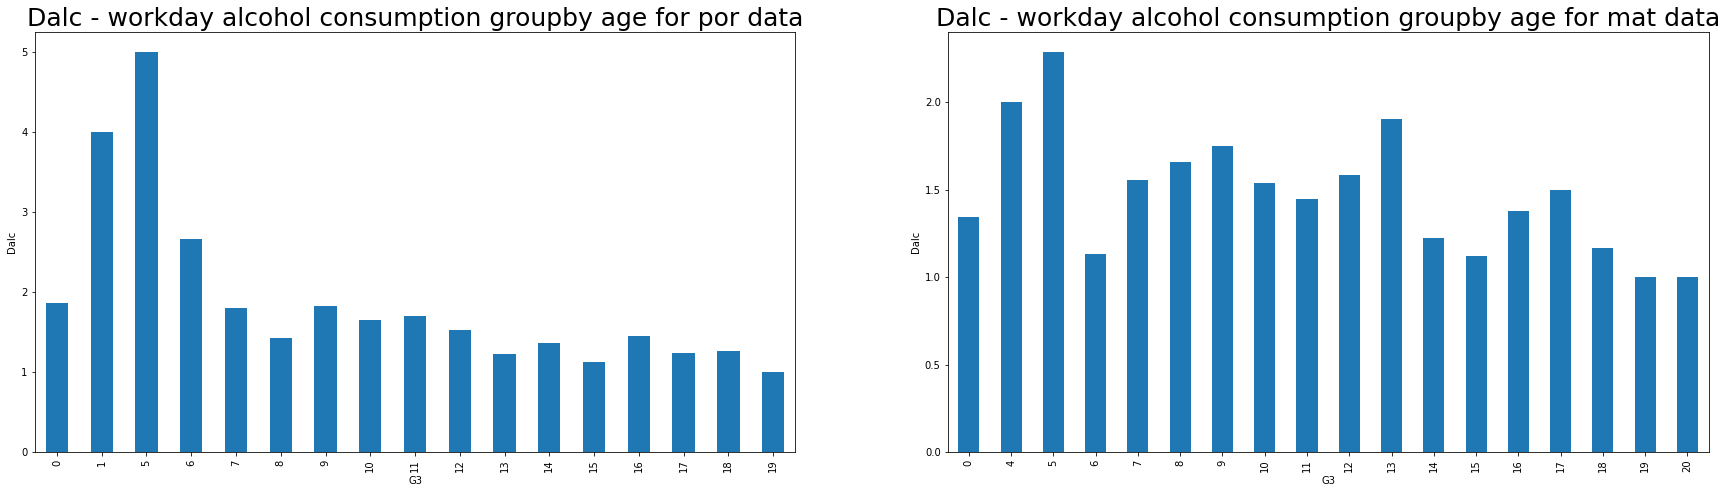

In [53]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('G3').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby G3 for por data')
plt.ylabel('Dalc')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('G3').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby G3 for mat data')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)

Biorąc pod uwagę oceny studentów, najwięcej piją studenci z ocenami poniżej ostatecznej. Natomiast porównując ilośc spożywanego alkoholu przez studentów kursu portugalskiego i matematyki, więcej piją z drugiego.

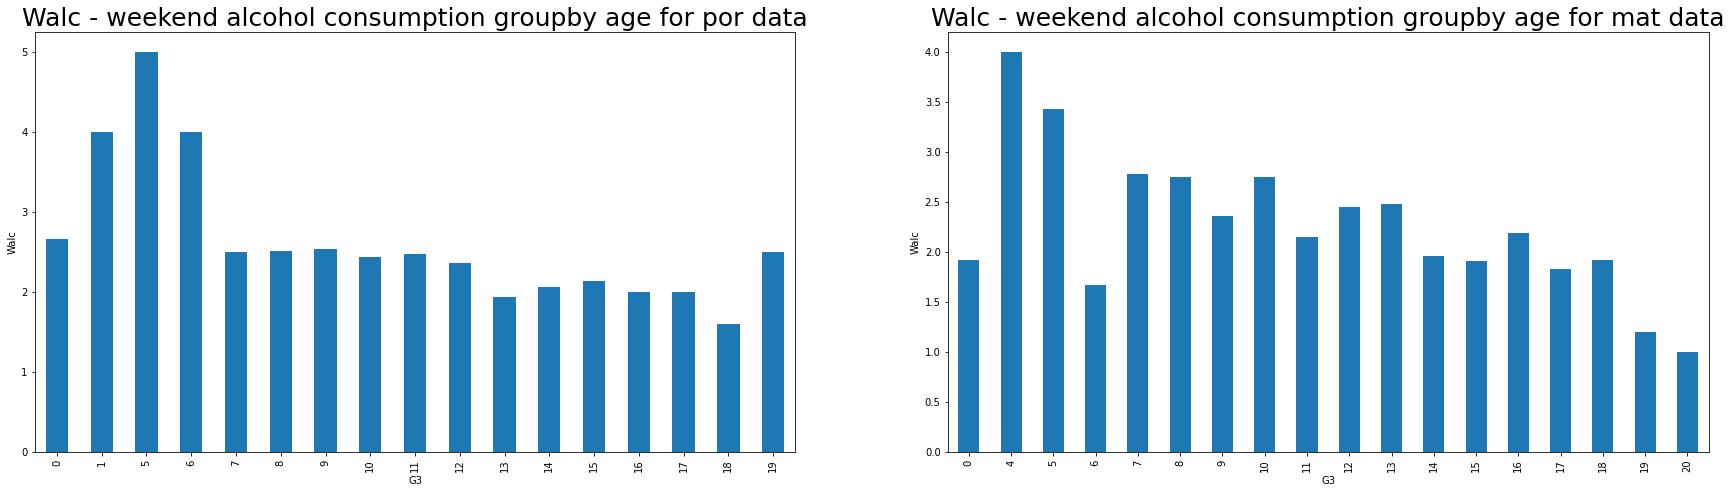

In [28]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('G3').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for por data')
plt.ylabel('Walc')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('G3').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)

Podobnie wygląda sytuacja w przypadku analizy zależności ocen od spożywanego w weekendy alkoholu. Najwięcej piją studenci z oceną poniżej dostatecznej, a więcej ogólnie piją studenci kursu matematyki.

Text(0.5, 1.0, 'A wish to get higher education by fathers education (Portugese class)')

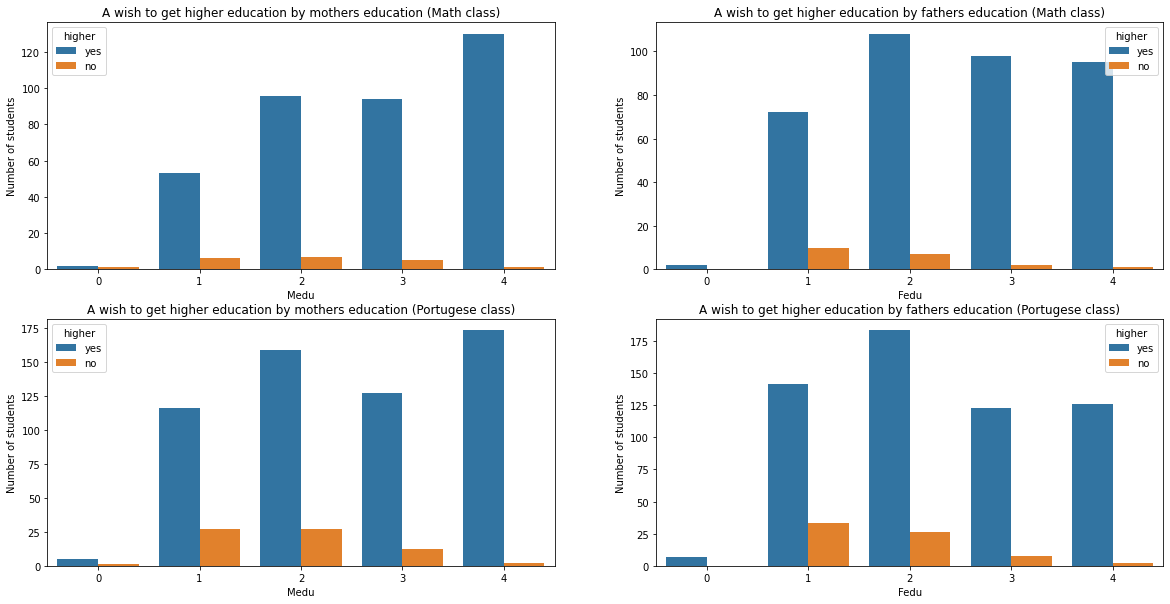

In [49]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('Medu', data=mat, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by mothers education (Math class)')
plt.subplot(2, 2, 2)
sns.countplot('Fedu', data=mat, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by fathers education (Math class)')
plt.subplot(2, 2, 3)
sns.countplot('Medu', data=por, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by mothers education (Portugese class)')
plt.subplot(2, 2, 4)
sns.countplot('Fedu', data=por, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by fathers education (Portugese class)')

Analizując chęć ukończenia wykształcenia wyższego od wykształcenia rodziców doszłyśmy do wniosków, że im wyższe wykształcenie posiada matka, tym więcej studentów wyraża chęć do kontynuowania nauki. Lecz w przypadku analizy wykształcenia ojca widać zależność odwrotną - najwięcej studentów chcą kontynuować uczenie się, gdy ojciec ma wykształcenie 2 (ukończone 5-9 klas).

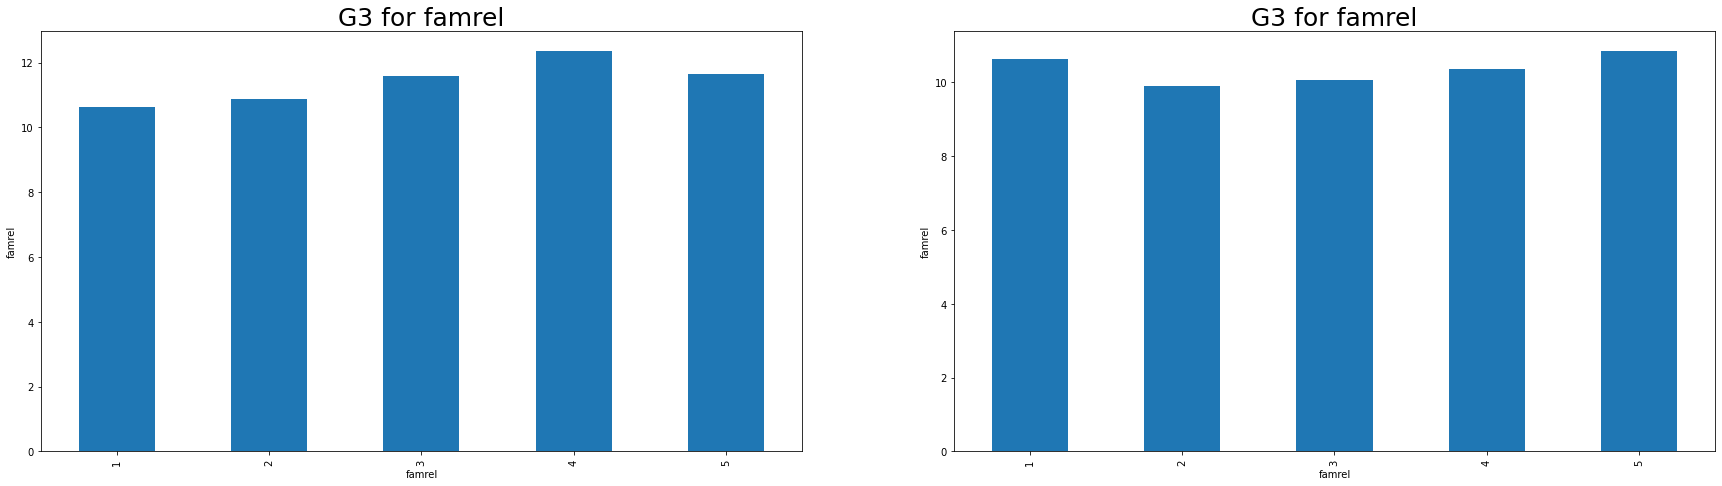

In [29]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('famrel').mean()['G3'].plot(kind='bar', title='G3 for famrel')
plt.ylabel('famrel')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('famrel').mean()['G3'].plot(kind='bar', title='G3 for famrel')
plt.ylabel('famrel')
bx.title.set_fontsize(25)

Text(0.5, 1.0, 'A wish to get higher education by grades (Portugese class)')

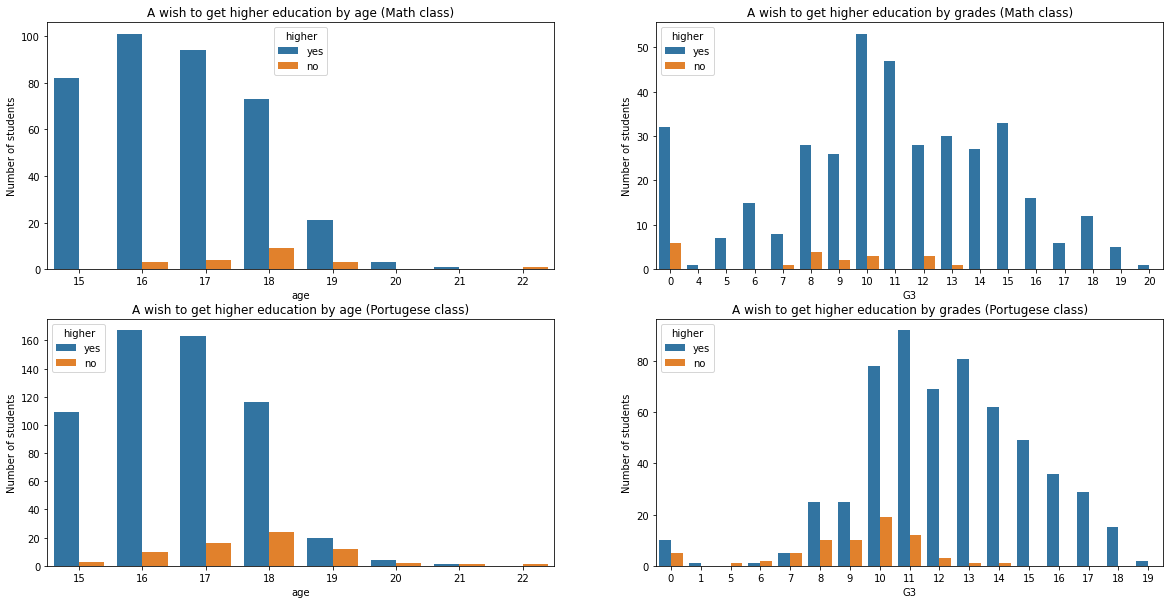

In [50]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('age', data=mat, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by age (Math class)')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=mat, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by grades (Math class)')
plt.subplot(2, 2, 3)
sns.countplot('age', data=por, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by age (Portugese class)')
plt.subplot(2, 2, 4)
sns.countplot('G3', data=por, hue='higher')
plt.ylabel('Number of students')
plt.title('A wish to get higher education by grades (Portugese class)')

Z przedstawionych wykresów można wywnioskować, że chęć do uzyskania wykształcenia wyższego wyrażają w znacznym ucznie w młodzym wieku. Również widać wyraźną zależność od ocen dla kursu Portugalskiego.

Naturalnie, nie wszytskie cechy są przydatne i niezbędne. Na przykład, w danej analizie nie zostały wzięte pod uwagę takie cechy jak miejsce zamieszkania, praca matki, praca ojca, powód wybrania tej szkoły, opiekun ucznia, uczęszczanie do przedszkola, dostęp do internetu w domu, związki romantyczne, aktualny stan zdrowia, czas dojazdu od domu do szkoły, G1 i G2.


Podsumowując, najbardziej skorelowanymi ocenami cechami są wykształcenie rodziców oraz liczba niepowodzen w zaliczeniu kursu.
Natomiast, powyzsze analizy stały się pomocnicze w wykryciu następujących związków pomiędzy cechami:
1. uczniowie posiadający najmniejsze ocene spożywiają najwięcej alkoholu,
2. najwięcej alkoholu jest spożyte przez uczniów wychodzącyh najwięcej w wolnym czasie,
3. więcej alkoholu piją chłopacy,
4. im lepsze jest wykształcenie rodziców, tym lepsze są postępy w nauce studenta,
5. złe stosunki w rodzinie powodują spożycie alkoholu przez młodzych uczniów,
6. najwięcej niepowodzeń w zaliczeniach jest spośród młodszych uczniów w wieku od 15 do 18 lat



**Przypuszczamy, że oceny końcowe zależą od liczby niepowodzeń w poprzednich klasach, wykształcenia rodziców i wsparcia rodzinnego, chęci do uzyskania wykształcenia wyższego, średniej spożycia alkoholu przez uczniów w dni powszechne i weekend oraz czasu, spędzonego za nauką.**